ĐỒ ÁN THỰC HÀNH #2

PTDLUD#5


| Thành viên             | MSSV          |
|:-----------------------|:-------------:|
| Nguyễn Thị Kim Ngân    | 19120598      |
| Nguyễn Thị Tiểu Mi     | 19120577      |
| Phạm Sơn Tùng          | 19120423      |
| Nguyễn Phước Huy       | 19120529      |

Giải thích ý nghĩa thuộc tính: [PTDLUD#5_DATH#2_FeatureDescription](https://docs.google.com/spreadsheets/d/1S2HZwc17QQyhySrJjz2--mquotvT0PD0mv3RG-_pemM/edit?usp=sharing)

In [1]:
#Cài đặt 1 số gói cần thiết
# !pip install pmdarima

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_1samp
from scipy import stats

In [3]:
#Tải dữ liệu nguồn 1
data1 = pd.read_csv("https://raw.githubusercontent.com/TungPham24/PTDLUD_DATA_DATH/main/dath1.csv")

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48858 entries, 0 to 48857
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              48858 non-null  int64  
 1   Name                            48858 non-null  object 
 2   Host ID                         48858 non-null  int64  
 3   Host Name                       48858 non-null  object 
 4   Neighbourhood Group             48858 non-null  object 
 5   Neighbourhood                   48858 non-null  object 
 6   Latitude                        48858 non-null  float64
 7   Longitude                       48858 non-null  float64
 8   Room Type                       48858 non-null  object 
 9   Price                           48858 non-null  int64  
 10  Minimum Nights                  48858 non-null  int64  
 11  Number of Reviews               48858 non-null  int64  
 12  Last Review                     

In [5]:
# #import pandas as pd
# url='https://drive.google.com/file/d/1LNGaI3jBQdwL4eSI67joZM_ZvMbpAWB0/view?usp=sharing'
# #url='https://drive.google.com/file/d/1BWeL63hyGqrqpVj4SZrd9C9SMMumIKXP/view?usp=share_link'
# url='https://drive.google.com/uc?id=' + url.split('/')[-2]
# # data2 = pd.read_csv(url)
# from google.colab import drive
# drive.mount('/content/drive')
data2=pd.read_csv('./airbnb-listings.csv', sep = ';')

C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/2502407864.py:8: DtypeWarning: Columns (40,83) have mixed types. Specify dtype option on import or set low_memory=False.
  data2=pd.read_csv('./airbnb-listings.csv', sep = ';')


In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19528 entries, 0 to 19527
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              19528 non-null  int64  
 1   Listing Url                     19528 non-null  object 
 2   Scrape ID                       19528 non-null  int64  
 3   Last Scraped                    19528 non-null  object 
 4   Name                            19510 non-null  object 
 5   Summary                         18730 non-null  object 
 6   Space                           13044 non-null  object 
 7   Description                     19518 non-null  object 
 8   Experiences Offered             19528 non-null  object 
 9   Neighborhood Overview           10784 non-null  object 
 10  Notes                           6680 non-null   object 
 11  Transit                         11564 non-null  object 
 12  Access                          

In [7]:
#data_2 = data2[['name','host_name','neighbourhood','room_type','price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365']]
cols = []
for col in data1.columns:
  if col in data2.columns:
    cols.append(col)

print(cols)
data_2= data2[cols]
data_2.info()

['ID', 'Name', 'Host ID', 'Host Name', 'Neighbourhood', 'Latitude', 'Longitude', 'Room Type', 'Price', 'Minimum Nights', 'Number of Reviews', 'Last Review', 'Reviews per Month', 'Calculated host listings count', 'Availability 365']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19528 entries, 0 to 19527
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              19528 non-null  int64  
 1   Name                            19510 non-null  object 
 2   Host ID                         19528 non-null  int64  
 3   Host Name                       19419 non-null  object 
 4   Neighbourhood                   16331 non-null  object 
 5   Latitude                        19528 non-null  float64
 6   Longitude                       19528 non-null  float64
 7   Room Type                       19528 non-null  object 
 8   Price                           19384 non-nu

In [8]:
df = data1.append(data_2)

C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/602280507.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = data1.append(data_2)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68386 entries, 0 to 19527
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              68386 non-null  int64  
 1   Name                            68368 non-null  object 
 2   Host ID                         68386 non-null  int64  
 3   Host Name                       68277 non-null  object 
 4   Neighbourhood Group             48858 non-null  object 
 5   Neighbourhood                   65189 non-null  object 
 6   Latitude                        68386 non-null  float64
 7   Longitude                       68386 non-null  float64
 8   Room Type                       68386 non-null  object 
 9   Price                           68242 non-null  float64
 10  Minimum Nights                  68386 non-null  int64  
 11  Number of Reviews               68386 non-null  int64  
 12  Last Review                     

In [10]:
df.head()

,ID,Name,Host ID,Host Name,Neighbourhood Group,Neighbourhood,Latitude,Longitude,Room Type,Price,Minimum Nights,Number of Reviews,Last Review,Reviews per Month,Calculated host listings count,Availability 365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,6/23/2019,0.72,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,11/19/2018,0.10,1,0


**DATA PRE-PROCESSING**

1. MISSING VALUES

1.a. Dataset 2:

In [11]:
#Tổng quan missing value của dataset

def visualize_missing_value(data):
  miss_dict = dict.fromkeys(data.columns,0)
  for col in data.columns:
    percentage = data[col].isnull().mean()
    miss_dict[col] = round(percentage*100,2)

  sorted_miss_list = sorted(miss_dict.items(), key=lambda x:x[1],reverse = True)

  sorted_miss_dict = dict(sorted_miss_list)
  for key, value in sorted_miss_dict.items():
    if value > 0:
      print(key, ' : ', value, '%')

visualize_missing_value(data2)

Host Acceptance Rate  :  100.0 %
Has Availability  :  100.0 %
License  :  100.0 %
Jurisdiction Names  :  99.99 %
Square Feet  :  98.7 %
Weekly Price  :  88.47 %
Monthly Price  :  83.61 %
Notes  :  65.79 %
Security Deposit  :  58.27 %
Interaction  :  47.95 %
Access  :  45.57 %
Neighborhood Overview  :  44.78 %
Host About  :  41.46 %
Transit  :  40.78 %
House Rules  :  38.74 %
Space  :  33.2 %
Host Response Time  :  32.73 %
Host Response Rate  :  32.73 %
Cleaning Fee  :  29.92 %
Review Scores Location  :  24.42 %
Review Scores Checkin  :  24.4 %
Review Scores Value  :  24.4 %
Review Scores Accuracy  :  24.38 %
Review Scores Cleanliness  :  24.29 %
Review Scores Communication  :  24.29 %
Review Scores Rating  :  24.17 %
First Review  :  22.52 %
Reviews per Month  :  22.52 %
Last Review  :  22.23 %
Thumbnail Url  :  21.68 %
Medium Url  :  21.68 %
XL Picture Url  :  21.68 %
Neighbourhood  :  16.37 %
Host Neighbourhood  :  14.64 %
Summary  :  4.09 %
Zipcode  :  2.04 %
Host Location  :  0.99 

In [12]:
data2['Host Since'].unique()

array(['2017-04-26', '2014-08-17', '2014-06-18', ..., '2011-05-15',
       '2017-05-02', '2010-09-01'], dtype=object)

Nhận xét:
  - Dataset 2 có những thuộc tính gần như không có dữ liệu để thống kê(tỉ lệ dữ liệu thiếu trên tổng số đạt tới hơn 80% như host_acceptance_rate, lisence, square_feet, has_availability,...)
  - Có nhiều cột thiếu khoảng một nửa dữ liệu (missing value chiếm từ 40% - 60% như neighborhood_overview, host_about,...)

In [13]:
#drop cột do cột có tỉ lệ missing value quá lớn
df1 = data2.drop(['Host Acceptance Rate', 'Has Availability', 'License', 'Jurisdiction Names', 'License', 'Square Feet'
, 'Notes', 'Thumbnail Url', 'Medium Url', 'XL Picture Url', 'Host Thumbnail Url', 'Host Picture Url', 'Description', 'Picture Url'
, 'Interaction', 'Access', 'Neighborhood Overview', 'Host About', 'Transit', 'House Rules', 'Space'], axis = 1)

In [14]:
#drop dòng chứa missing value của các thuộc tính bên dưới do tỉ lệ missing value không đáng kể
df_2 = df1.dropna(subset = ['Host Location','Amenities','Host Name','Host Since','Host Listings Count','Host Total Listings Count'
,'Market','Bathrooms','Beds','Bedrooms','Features','Name','Host Verifications','Neighbourhood Group Cleansed','Zipcode','Summary'])

In [15]:
#điền dữ liệu thiếu
#rút trích cột để lấy số liệu thống kê tổng quát:

df3 = df_2[['Host Response Rate', 'Cleaning Fee', 'Review Scores Location', 'Review Scores Checkin', 'Review Scores Value', 'Review Scores Accuracy'
, 'Review Scores Cleanliness', 'Review Scores Communication', 'Review Scores Rating', 'Reviews per Month', 'Security Deposit']]
df3.describe()

,Host Response Rate,Cleaning Fee,Review Scores Location,Review Scores Checkin,Review Scores Value,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Communication,Review Scores Rating,Reviews per Month,Security Deposit
count,12101.000000,12593.000000,13543.000000,13547.000000,13546.000000,13552.000000,13564.000000,13566.000000,13585.000000,13883.000000,7444.000000
mean,90.497645,68.020726,9.572547,9.686720,9.302968,9.492473,9.151578,9.721215,92.718808,1.338745,292.358006
std,20.634692,48.177555,0.731109,0.729078,0.897419,0.878797,1.146060,0.696346,8.707413,1.821590,173.692503
min,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,20.000000,0.020000,0.000000
25%,90.000000,35.000000,9.000000,10.000000,9.000000,9.000000,9.000000,10.000000,90.000000,0.260000,150.000000
50%,100.000000,60.000000,10.000000,10.000000,9.000000,10.000000,9.000000,10.000000,95.000000,0.790000,250.000000
75%,100.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,100.000000,1.990000,480.000000
max,100.000000,600.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,100.000000,125.920000,999.000000


<AxesSubplot:xlabel='Review Scores Communication', ylabel='Count'>

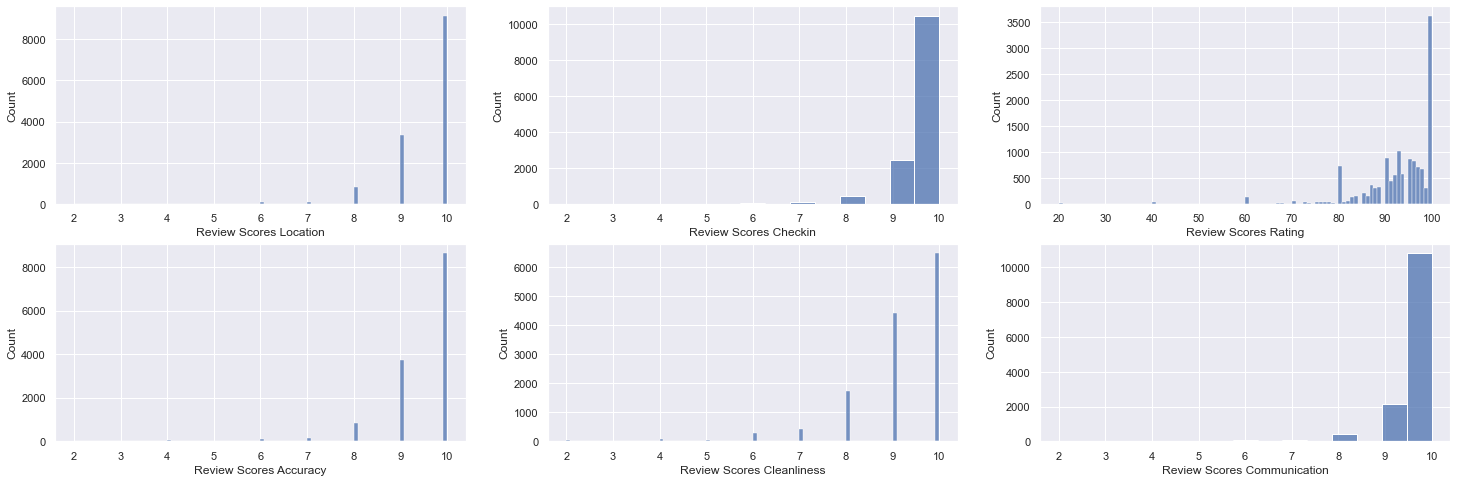

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
figure, axes = plt.subplots(2,3, figsize=(25,8))
sns.histplot(ax = axes[0,0], data = df3['Review Scores Location'])
sns.histplot(ax = axes[0,1], data = df3['Review Scores Checkin'])
sns.histplot(ax = axes[0,2], data = df3['Review Scores Rating'])
sns.histplot(ax = axes[1,0], data = df3['Review Scores Accuracy'])
sns.histplot(ax = axes[1,1], data = df3['Review Scores Cleanliness'])
sns.histplot(ax = axes[1,2], data = df3['Review Scores Communication'])

<AxesSubplot:xlabel='Host Response Rate', ylabel='Count'>

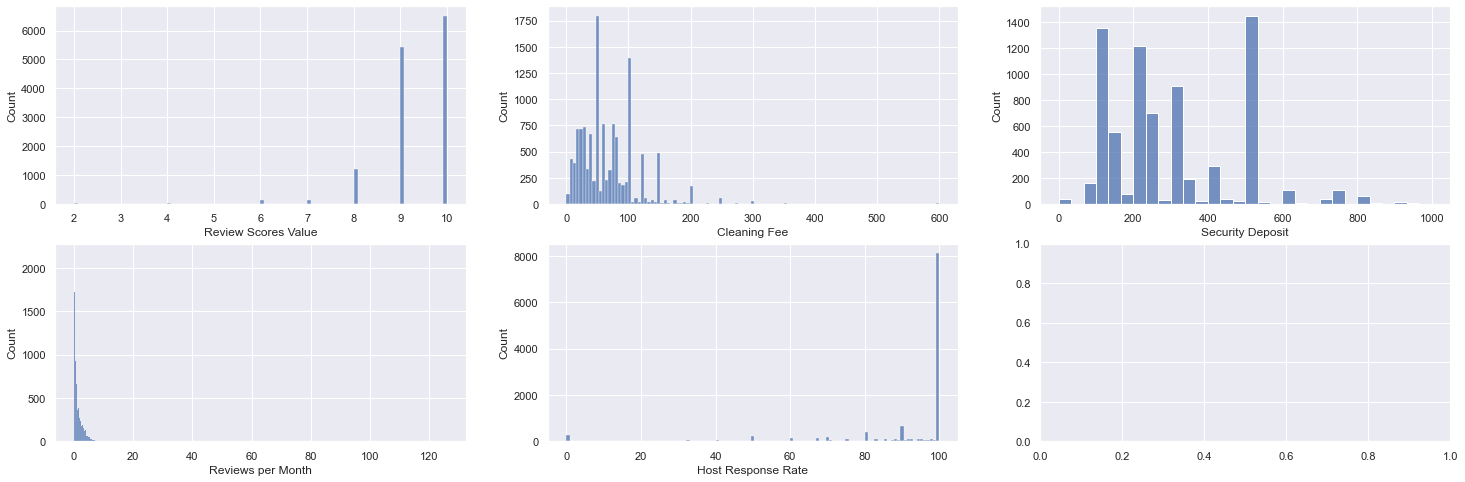

In [17]:
sns.set()

figure, axes = plt.subplots(2,3, figsize=(25,8))
sns.histplot(ax = axes[0,0], data = df3['Review Scores Value'])
sns.histplot(ax = axes[0,1], data = df3['Cleaning Fee'])
sns.histplot(ax = axes[0,2], data = df3['Security Deposit'])
sns.histplot(ax = axes[1,0], data = df3['Reviews per Month'])
sns.histplot(ax = axes[1,1], data = df3['Host Response Rate'])

In [18]:
#điền giá trị null dựa vào giá trị thống kê + hình dạng biểu đồ histogram
['Host Response Rate', 'Cleaning Fee', 'Review Scores Location', 'Review Scores Checkin', 'Review Scores Value', 'Review Scores Accuracy'
, 'Review Scores Cleanliness', 'Review Scores Communication', 'Review Scores Rating', 'Reviews per Month', 'Security Deposit']
df_2['Review Scores Communication'].fillna(10, inplace = True)
df_2['Review Scores Location'].fillna(10, inplace = True)
df_2['Review Scores Rating'].fillna(100, inplace = True)
df_2['Review Scores Cleanliness'].fillna(10, inplace = True)
df_2['Review Scores Accuracy'].fillna(10, inplace = True)
df_2['Review Scores Checkin'].fillna(10, inplace = True)
df_2['Review Scores Value'].fillna(10, inplace = True)
df_2['Cleaning Fee'].fillna(60, inplace = True)
df_2['Security Deposit'].fillna(250.000000, inplace = True)
df_2['Host Response Rate'].fillna(100, inplace = True)
df_2['Reviews per Month'].fillna(0.79, inplace = True)

C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/687007950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Review Scores Communication'].fillna(10, inplace = True)
C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/687007950.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Review Scores Location'].fillna(10, inplace = True)
C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/687007950.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [19]:
visualize_missing_value(df_2)

Weekly Price  :  88.7 %
Monthly Price  :  84.25 %
Host Response Time  :  32.32 %
First Review  :  22.36 %
Last Review  :  22.11 %
Neighbourhood  :  15.07 %
Host Neighbourhood  :  12.89 %
Price  :  0.7 %


In [20]:
missing_df = df_2[['Neighbourhood', 'Host Neighbourhood', 'First Review', 'Last Review', 'Host Response Time']]
missing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17881 entries, 0 to 19527
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Neighbourhood       15186 non-null  object
 1   Host Neighbourhood  15576 non-null  object
 2   First Review        13883 non-null  object
 3   Last Review         13928 non-null  object
 4   Host Response Time  12101 non-null  object
dtypes: object(5)
memory usage: 838.2+ KB


In [21]:
miss_dict = dict.fromkeys(missing_df.columns,0)
for col in missing_df.columns:
  miss_dict[col] = missing_df[col].mode()

for key, value in miss_dict.items():
    print(key, ' : ', value)

Neighbourhood  :  0    Upper West Side
Name: Neighbourhood, dtype: object
Host Neighbourhood  :  0    Harlem
Name: Host Neighbourhood, dtype: object
First Review  :  0    2017-01-01
Name: First Review, dtype: object
Last Review  :  0    2017-04-16
Name: Last Review, dtype: object
Host Response Time  :  0    within an hour
Name: Host Response Time, dtype: object


In [22]:
df_2['Neighbourhood'].fillna('Upper West Side', inplace = True)
df_2['Host Neighbourhood'].fillna('Harlem', inplace = True)
df_2['First Review'].fillna('2017-01-01', inplace = True)
df_2['Last Review'].fillna('2017-04-16', inplace = True)
df_2['Host Response Time'].fillna('within an hour', inplace = True)

C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/2539925374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Neighbourhood'].fillna('Upper West Side', inplace = True)
C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/2539925374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Host Neighbourhood'].fillna('Harlem', inplace = True)
C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/2539925374.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [23]:
df_2_temp = df_2

Xử lý giá thiếu:

In [24]:
df_price = df_2[['Price', 'Weekly Price', 'Monthly Price']]
df_price.describe()

,Price,Weekly Price,Monthly Price
count,17756.000000,2021.000000,2816.000000
mean,166.552771,621.433449,3564.685724
std,121.989026,189.912289,3424.762028
min,10.000000,70.000000,300.000000
25%,89.000000,487.000000,1850.000000
50%,135.000000,600.000000,2800.000000
75%,200.000000,790.000000,4100.000000
max,999.000000,999.000000,60000.000000


In [25]:
#giá cao
high_price_2 = df_2.copy()
high_price_2['Price'].fillna(200, inplace = True)
high_price_2['Weekly Price'].fillna(790, inplace = True)
high_price_2['Monthly Price'].fillna(4100, inplace = True)
#giá thấp
low_price_2 = df_2.copy()
low_price_2['Price'].fillna(135, inplace = True)
low_price_2['Weekly Price'].fillna(600, inplace = True)
low_price_2['Monthly Price'].fillna(2800.000000, inplace = True)

Xử lý missing value cho dữ liệu kết hợp từ 2 nguồn

In [26]:
visualize_missing_value(df)

Neighbourhood Group  :  28.56 %
Reviews per Month  :  6.43 %
Last Review  :  6.35 %
Neighbourhood  :  4.67 %
Price  :  0.21 %
Host Name  :  0.16 %
Name  :  0.03 %


In [27]:
df2 = df.dropna(subset = ['Host Name', 'Name'])
missing_df = df2[['Reviews per Month', 'Last Review', 'Neighbourhood']]
miss_dict = dict.fromkeys(missing_df.columns,0)
for col in missing_df.columns:
  miss_dict[col] = missing_df[col].mode()

for key, value in miss_dict.items():
    print(key, ' : ', value)

Reviews per Month  :  0    0.72
Name: Reviews per Month, dtype: float64
Last Review  :  0    6/23/2019
Name: Last Review, dtype: object
Neighbourhood  :  0    Harlem
Name: Neighbourhood, dtype: object


In [28]:
df2['Reviews per Month'].fillna(0.72, inplace = True)
df2['Last Review'].fillna('6/23/2019', inplace = True)
df2['Neighbourhood'].fillna('Harlem', inplace = True)

C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/1699058954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Reviews per Month'].fillna(0.72, inplace = True)
C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/1699058954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Last Review'].fillna('6/23/2019', inplace = True)
C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/1699058954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [29]:
df2_temp = df2

Xử lý giá còn thiếu:

In [30]:
df2['Price'].describe()

count    68115.000000
mean       156.589899
std        213.624845
min          0.000000
25%         75.000000
50%        116.000000
75%        185.000000
max      10000.000000
Name: Price, dtype: float64

In [31]:
low_price = df2.copy()
low_price['Price'].fillna(116, inplace = True)

high_price = df2.copy()
high_price['Price'].fillna(185, inplace = True)

In [32]:
def renameDataFrame(data):
  col_list = []
  for col in data.columns:
    col_list.append(col)

  col_list_new = []
  for col in col_list:
    temp1 = col.lower()
    temp2 = temp1.replace(' ', '_')
    col_list_new.append(temp2)
    
  temp_dict = dict.fromkeys(col_list)
  i = 0
  for k in temp_dict:
    temp_dict[k] = col_list_new[i]
    i += 1
  
  data.rename(columns = temp_dict, inplace = True)

In [33]:
renameDataFrame(df2)
renameDataFrame(df_2)
renameDataFrame(high_price_2)
renameDataFrame(low_price_2)
renameDataFrame(high_price)
renameDataFrame(low_price)

C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/2243854561.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns = temp_dict, inplace = True)
C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/2243854561.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns = temp_dict, inplace = True)


2. DUPLICATE

Kiểm tra trùng lặp ở dataset 2

In [34]:
df_2.duplicated().any()

False

**Nhận xét:** Dữ liệu ở dataset 2 không có dòng nào bị trùng lặp

Kiểm tra trùng lặp ở dữ liệu kết hợp từ 2 nguồn 

In [35]:
df2.duplicated().any()

False

**Nhận xét:** Dữ liệu kết hợp từ 2 nguồn không có dòng nào bị trùng lặp

3. OUTLIER


Xử lý OUTLIER ở dataset 2

<AxesSubplot:xlabel='price'>

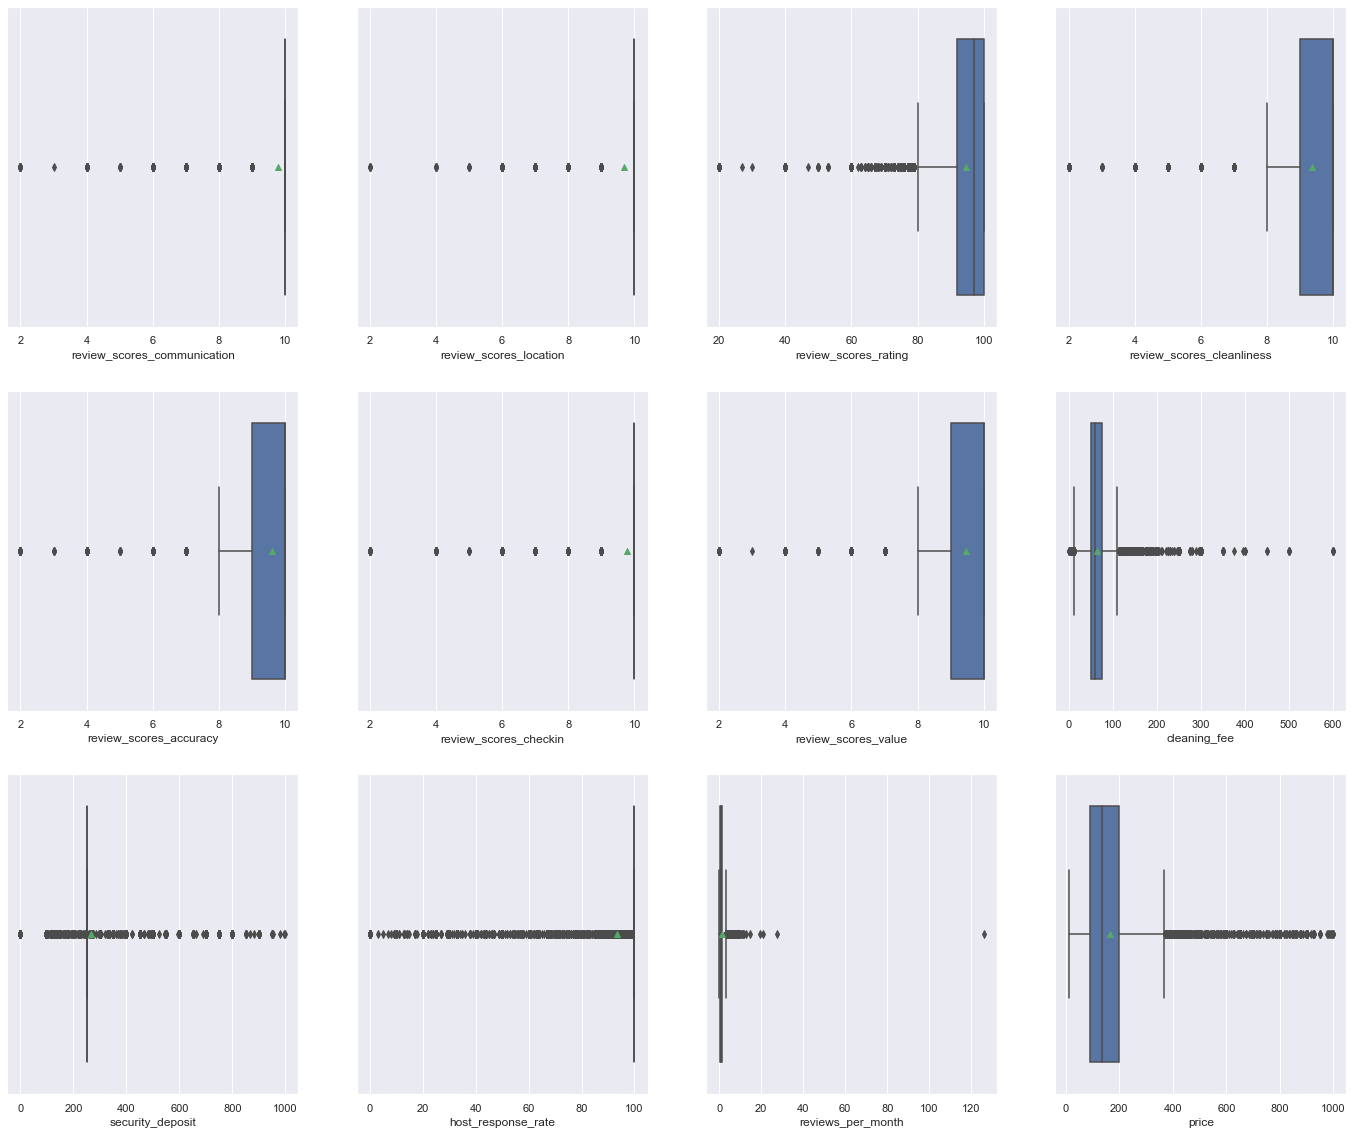

In [36]:
fig, axs = plt.subplots(3,4, figsize = (24,20))

sns.boxplot(data=df_2, x="review_scores_communication", ax=axs[0,0],showmeans=True)
sns.boxplot(data=df_2, x="review_scores_location", ax=axs[0,1],showmeans=True)
sns.boxplot(data=df_2, x="review_scores_rating", ax=axs[0,2],showmeans=True)
sns.boxplot(data=df_2, x="review_scores_cleanliness", ax=axs[0,3],showmeans=True)
sns.boxplot(data=df_2, x="review_scores_accuracy", ax=axs[1,0],showmeans=True)
sns.boxplot(data=df_2, x="review_scores_checkin", ax=axs[1,1],showmeans=True)
sns.boxplot(data=df_2, x="review_scores_value", ax=axs[1,2],showmeans=True)
sns.boxplot(data=df_2, x="cleaning_fee", ax=axs[1,3],showmeans=True)
sns.boxplot(data=df_2, x="security_deposit", ax=axs[2,0],showmeans=True)
sns.boxplot(data=df_2, x="host_response_rate", ax=axs[2,1],showmeans=True)
sns.boxplot(data=df_2, x="reviews_per_month", ax=axs[2,2],showmeans=True)
sns.boxplot(data=df_2, x="price", ax=axs[2,3],showmeans=True)



**Nhận xét:** Các thuộc tính có nhiều outlier là: **security_deposit**, **host_response_rate**, **price**; còn các thuộc tính còn lại so với lượng dữ liệu thì outlier là không đáng kể
* Với thuộc tính **security_deposit**: Đây là tiền đặt cọc khi tiến hành đặt trước các phòng, thông thường sẽ chiếm một số lượng % nhất định so với giá thuê, nên các outlier ở đây vẫn có ý nghĩa thống kê tùy theo giá của từng phòng cao thấp khác nhau

* Với thuộc tính **host_response_rate**: đây là tốc độ phản hồi của người chủ, các outlier ở đây có ý nghĩa thống kê, bởi vì sẽ có các chủ không phản hồi khách hàng nhanh (chất lượng dịch vụ khách hàng không tốt) và cũng có các chủ luôn phản hồi khách hàng một cách nhanh chóng (chất lượng dịch vụ khách hàng tốt)

* Với thuộc tính **price**: giá của các loại phòng sẽ có nhiều giá khác nhau tùy vào các điều kiện, các outlier ở đây vẫn có ý nghĩa vì sẽ có các phòng có giá cao vì phòng đó có điều kiện tốt hơn <br>

**Kết luận:** Ta vẫn giữ lại các outlier để phục vụ cho việc phân tích





Xử lý OUTLIER ở dữ liệu kết hợp từ 2 nguồn 

<AxesSubplot:xlabel='availability_365'>

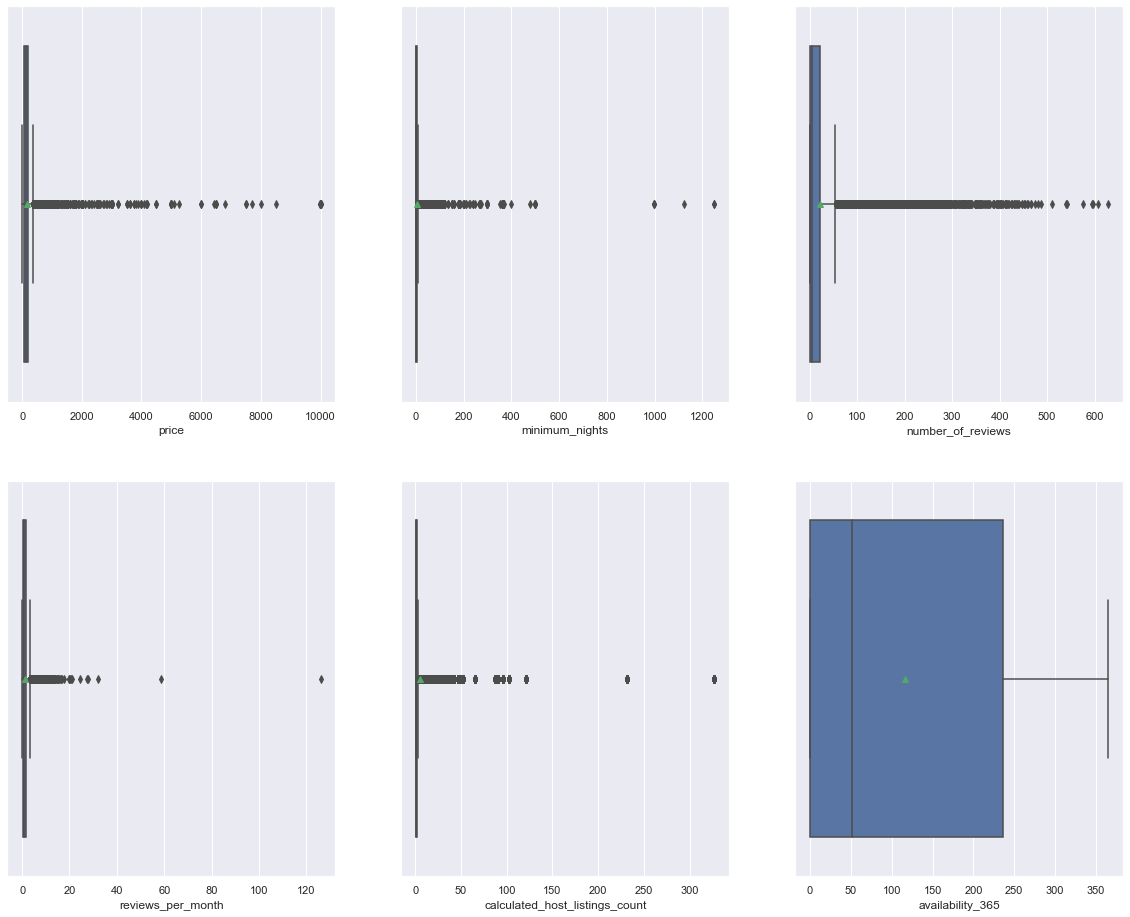

In [37]:
fig, axs = plt.subplots(2,3, figsize = (20,16))

sns.boxplot(data=df2, x="price", ax=axs[0,0],showmeans=True)
sns.boxplot(data=df2, x="minimum_nights", ax=axs[0,1],showmeans=True)
sns.boxplot(data=df2, x="number_of_reviews", ax=axs[0,2],showmeans=True)
sns.boxplot(data=df2, x="reviews_per_month", ax=axs[1,0],showmeans=True)
sns.boxplot(data=df2, x="calculated_host_listings_count", ax=axs[1,1],showmeans=True)
sns.boxplot(data=df2, x="availability_365", ax=axs[1,2],showmeans=True)

**Nhận xét:** Các thuộc tính có nhiều outlier là: **price** và **number_of_reviews**, còn các thuộc tính còn lại so với lượng dữ liệu thì outlier là không đáng kể
* Ở thuộc tính **price**: outlier này xuất hiện là do sẽ có những phòng giá cao do các điều kiện tốt hơn, nên chúng có ý nghĩa thống kê

* Ở thuộc tính **number_of_reviews**: số lượng review này thì sẽ phụ thuộc vào khách hàng có review hay không, các phòng có số lượng review cao thì có khả năng là có nhiều khách đến, điều đó giúp ta đánh giá về chất lượng của phòng chính xác hơn nên chúng có ý nghĩa thống kê <br>

**Kết luận:** Ta sẽ vẫn giữ lại các outlier để phục vụ cho việc phân tích

<font size=10>VISUALIZATION</font>

In [38]:
df2.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,6/23/2019,0.72,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,11/19/2018,0.10,1,0


**Trực quan hóa những thuộc tính thuộc dataset2**

In [39]:
#df_cont = df2.select_dtypes(include=['int64','float64']) // lay du lieu tu df chi co 10 cot
df_cont = df_2.select_dtypes(include=['int64','float64'])
df_cont.head()

,id,scrape_id,host_id,host_response_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,18419614,20170502132028,127646105,100.0,1.0,1.0,40.704633,-74.016957,4,1.0,...,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0.79
1,8720786,20170502132028,20134279,38.0,1.0,1.0,40.709901,-74.016094,3,1.0,...,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0.79
2,7500228,20170502132028,16960158,100.0,1.0,1.0,40.710113,-74.014570,2,1.0,...,31,94.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1.46
3,1498245,20170502132028,6759918,100.0,1.0,1.0,40.718293,-74.014019,2,1.0,...,3,95.0,10.0,9.0,10.0,9.0,10.0,9.0,1,0.07
4,13231583,20170502132028,72674364,100.0,1.0,1.0,40.704649,-74.016615,3,1.0,...,29,95.0,10.0,10.0,9.0,9.0,10.0,10.0,1,2.61


In [40]:
df_cont.columns

Index(['id', 'scrape_id', 'host_id', 'host_response_rate',
       'host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

**Kiểm tra phân phối chuẩn**

Text(0.5, 0, 'Host Response Rate')

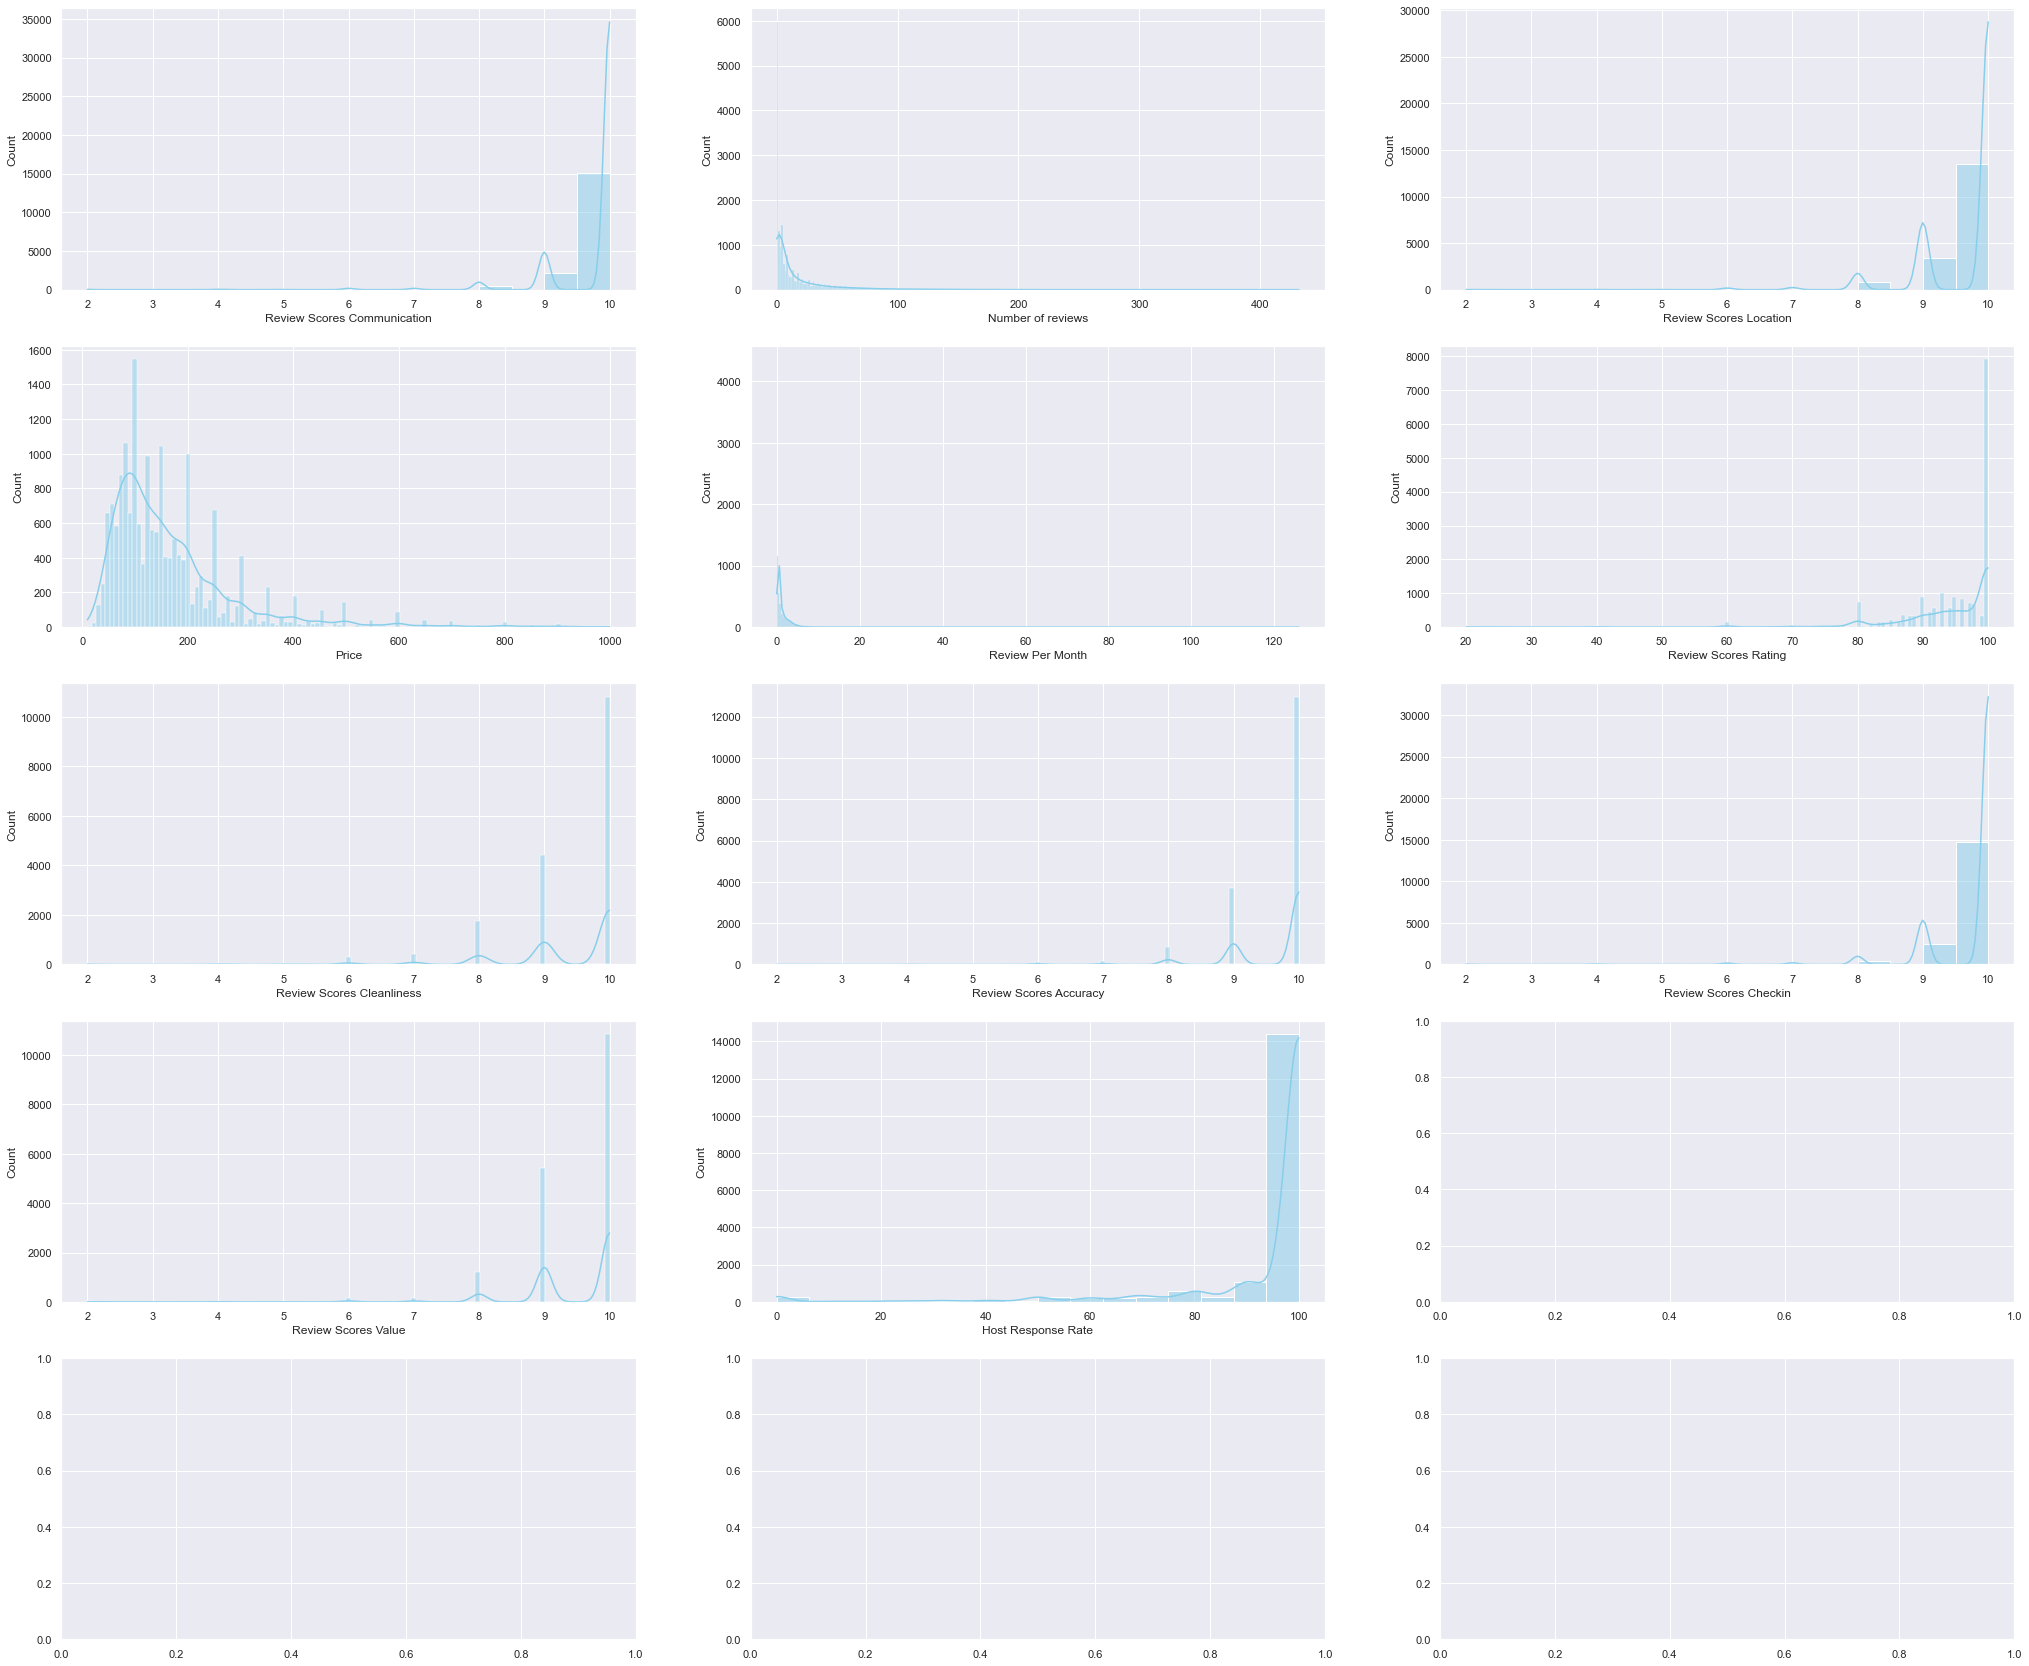

In [41]:
fig, axs = plt.subplots(5, 3, figsize=(35, 30))
sns.histplot(data=df_cont, x="review_scores_communication", kde=True, color="skyblue", ax=axs[0,0]).set_xlabel("Review Scores Communication")
sns.histplot(data=df_cont, x="number_of_reviews", kde=True, color="skyblue", ax=axs[0,1]).set_xlabel("Number of reviews")
sns.histplot(data=df_cont, x="review_scores_location", kde=True, color="skyblue", ax=axs[0,2]).set_xlabel("Review Scores Location")
sns.histplot(data=df_cont, x="price", kde=True, color="skyblue", ax=axs[1,0]).set_xlabel("Price")
sns.histplot(data=df_cont, x="reviews_per_month", kde=True, color="skyblue", ax=axs[1,1]).set_xlabel("Review Per Month")
sns.histplot(data=df_cont, x="review_scores_rating", kde=True, color="skyblue", ax=axs[1,2]).set_xlabel("Review Scores Rating")
sns.histplot(data=df_cont, x="review_scores_cleanliness", kde=True, color="skyblue", ax=axs[2,0]).set_xlabel("Review Scores Cleanliness")
sns.histplot(data=df_cont, x="review_scores_accuracy", kde=True, color="skyblue", ax=axs[2,1]).set_xlabel("Review Scores Accuracy")
sns.histplot(data=df_cont, x="review_scores_checkin", kde=True, color="skyblue", ax=axs[2,2]).set_xlabel("Review Scores Checkin")
sns.histplot(data=df_cont, x="review_scores_value", kde=True, color="skyblue", ax=axs[3,0]).set_xlabel("Review Scores Value")
sns.histplot(data=df_cont, x="host_response_rate", kde=True, color="skyblue", ax=axs[3,1]).set_xlabel("Host Response Rate")

**Nhận xét:** Dữ liệu không có phân phối chuẩn.

Đặt giả thuyết
* H0: Dữ liệu có phân phối chuẩn
* H0: Dữ liệu không phân phối chuẩn


In [42]:
#Xây dựng hàm kiểm tra phân phối chuẩn
def is_normal(data,prop):
  ttest, pval = ttest_1samp(data,50)
  print('p-value =', pval)
  if pval < 0.05:
      print(f'p-value < 0.05 nên bác bỏ H0,{prop} không có phân phối chuẩn')
  else:
      print(f'Do p-value > 0.05 nên bác bỏ Ha, {prop} có phân phối chuẩn')

is_normal(df_cont['review_scores_communication'],'review_scores_communication')
is_normal(df_cont['number_of_reviews'],'number_of_reviews')
is_normal(df_cont['review_scores_location'],'review_scores_location')
is_normal(df_cont['price'],'price')
is_normal(df_cont['reviews_per_month'],'reviews_per_month')
is_normal(df_cont['review_scores_rating'],'review_scores_rating')
is_normal(df_cont['review_scores_cleanliness'],'review_scores_cleanliness')
is_normal(df_cont['review_scores_accuracy'],'review_scores_accuracy')
is_normal(df_cont['review_scores_checkin'],'review_scores_checkin')
is_normal(df_cont['review_scores_value'],'review_scores_value')
is_normal(df_cont['host_response_rate'],'host_response_rate')

#Xử lý dữ liệu 
# feature_norm1, _ = stats.boxcox(df_cont['review_scores_communication'])
# #feature_norm2, _ = stats.boxcox(df_cont['number_of_reviews'])
# # feature_norm3, _ = stats.boxcox(df_cont['review_scores_location'])
# feature_norm4, _ = stats.boxcox(df_cont['price'])
# feature_norm5, _ = stats.boxcox(df_cont['reviews_per_month'])
# feature_norm6, _ = stats.boxcox(df_cont['review_scores_rating'])
# feature_norm7, _ = stats.boxcox(df_cont['review_scores_cleanliness'])
# feature_norm8, _ = stats.boxcox(df_cont['review_scores_accuracy'])
# feature_norm9, _ = stats.boxcox(df_cont['review_scores_checkin'])
# feature_norm10, _ = stats.boxcox(df_cont['review_scores_value'])
# feature_norm11, _ = stats.boxcox(df_cont['host_response_rate'])


p-value = 0.0
p-value < 0.05 nên bác bỏ H0,review_scores_communication không có phân phối chuẩn
p-value = 0.0
p-value < 0.05 nên bác bỏ H0,number_of_reviews không có phân phối chuẩn
p-value = 0.0
p-value < 0.05 nên bác bỏ H0,review_scores_location không có phân phối chuẩn
p-value = nan
Do p-value > 0.05 nên bác bỏ Ha, price có phân phối chuẩn
p-value = 0.0
p-value < 0.05 nên bác bỏ H0,reviews_per_month không có phân phối chuẩn
p-value = 0.0
p-value < 0.05 nên bác bỏ H0,review_scores_rating không có phân phối chuẩn
p-value = 0.0
p-value < 0.05 nên bác bỏ H0,review_scores_cleanliness không có phân phối chuẩn
p-value = 0.0
p-value < 0.05 nên bác bỏ H0,review_scores_accuracy không có phân phối chuẩn
p-value = 0.0
p-value < 0.05 nên bác bỏ H0,review_scores_checkin không có phân phối chuẩn
p-value = 0.0
p-value < 0.05 nên bác bỏ H0,review_scores_value không có phân phối chuẩn
p-value = 0.0
p-value < 0.05 nên bác bỏ H0,host_response_rate không có phân phối chuẩn


**KIỂM TRA PHÂN PHỐI CHUẨN CỦA CÁC THUỘC TÍNH CHUNG CỦA 2 DATASET**

In [43]:
df2['room_type_idx'] = df2.room_type.map({'Private room':1,'Entire home/apt':2,'Shared room':3})
df_merge = df2.select_dtypes(include=['int64','float64'])

C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/2907519557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['room_type_idx'] = df2.room_type.map({'Private room':1,'Entire home/apt':2,'Shared room':3})


In [44]:
df_merge.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_idx
0,2539,2787,40.64749,-73.97237,149.0,1,9,0.21,6,365,1
1,2595,2845,40.75362,-73.98377,225.0,1,45,0.38,2,355,2
2,3647,4632,40.80902,-73.94190,150.0,3,0,0.72,1,365,1
3,3831,4869,40.68514,-73.95976,89.0,1,270,4.64,1,194,2
4,5022,7192,40.79851,-73.94399,80.0,10,9,0.10,1,0,2


In [45]:
## Kiểm tra giả thuyết dữ liệu có phân phối chuẩn hay không thông qua T-Test
for index, feature_name in enumerate(df_merge.columns):
    is_normal(df_merge[feature_name], feature_name)

p-value = 0.0
p-value < 0.05 nên bác bỏ H0,id không có phân phối chuẩn
p-value = 0.0
p-value < 0.05 nên bác bỏ H0,host_id không có phân phối chuẩn
p-value = 0.0
p-value < 0.05 nên bác bỏ H0,latitude không có phân phối chuẩn
p-value = 0.0
p-value < 0.05 nên bác bỏ H0,longitude không có phân phối chuẩn
p-value = nan
Do p-value > 0.05 nên bác bỏ Ha, price có phân phối chuẩn
p-value = 0.0
p-value < 0.05 nên bác bỏ H0,minimum_nights không có phân phối chuẩn
p-value = 0.0
p-value < 0.05 nên bác bỏ H0,number_of_reviews không có phân phối chuẩn
p-value = 0.0
p-value < 0.05 nên bác bỏ H0,reviews_per_month không có phân phối chuẩn
p-value = 0.0
p-value < 0.05 nên bác bỏ H0,calculated_host_listings_count không có phân phối chuẩn
p-value = 0.0
p-value < 0.05 nên bác bỏ H0,availability_365 không có phân phối chuẩn
p-value = 0.0
p-value < 0.05 nên bác bỏ H0,room_type_idx không có phân phối chuẩn


**Nhận xét:** Có thể thấy `price` và `calculated_host_listings_count` đều có phân phối chuẩn

Text(0.5, 0.98, 'Distribution after BoxCox transfomation')

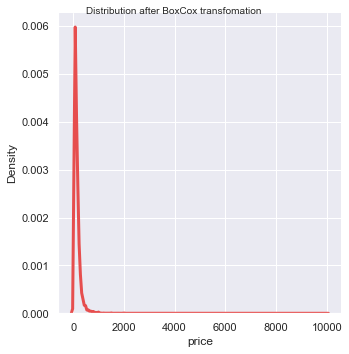

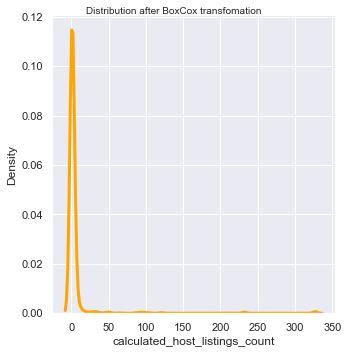

In [46]:
ax = sns.displot(df_merge['price'], kind = "kde",color = "#e64e4e", height=5, aspect=1,
            linewidth = 3 )
ax.fig.suptitle('Distribution after BoxCox transfomation', size = 10)

ax = sns.displot(df_merge['calculated_host_listings_count'], kind = "kde",color = "orange", height=5, aspect=1,
            linewidth = 3 )
ax.fig.suptitle('Distribution after BoxCox transfomation', size = 10)

(array([  65., 2229., 7857., 9357., 8504., 6506., 5897., 5758., 3666.,
        3367., 2955., 1821., 2440.,  858.,  907., 1084.,  403.,  819.,
         266.,  373.,  432.,  157.,  335.,   84.,  206.,  308.,   49.,
         113.,   36.,  239.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
        220., 240., 260., 280., 300., 320., 340., 360., 380., 400., 420.,
        440., 460., 480., 500., 520., 540., 560., 580., 600.]),
 <BarContainer object of 30 artists>)

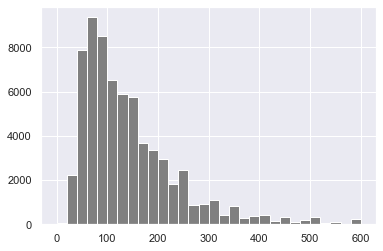

In [47]:

plt.hist(df_merge['price'],30,range=[0,600],facecolor='gray', align='mid')


(array([    0.,     0.,     0.,     0.,     0.,     0.,     0., 47671.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,  8969.,
            0.,     0.,     0.,     0.,     0.,     0.,  3606.,     0.,
            0.,     0.,     0.,     0.,     0.,  1760.]),
 array([0.        , 0.13333333, 0.26666667, 0.4       , 0.53333333,
        0.66666667, 0.8       , 0.93333333, 1.06666667, 1.2       ,
        1.33333333, 1.46666667, 1.6       , 1.73333333, 1.86666667,
        2.        , 2.13333333, 2.26666667, 2.4       , 2.53333333,
        2.66666667, 2.8       , 2.93333333, 3.06666667, 3.2       ,
        3.33333333, 3.46666667, 3.6       , 3.73333333, 3.86666667,
        4.        ]),
 <BarContainer object of 30 artists>)

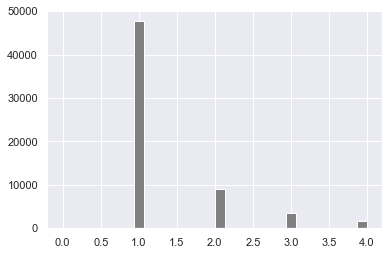

In [48]:
plt.hist(df_merge['calculated_host_listings_count'],30,range=[0,4],facecolor='gray', align='mid')

**Trực quan mối quan hệ giữa 1 vài thuộc tính trong bộ thuộc tính chung**

In [49]:
df2.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'room_type_idx'],
      dtype='object')

<AxesSubplot:xlabel='room_type_idx', ylabel='price'>

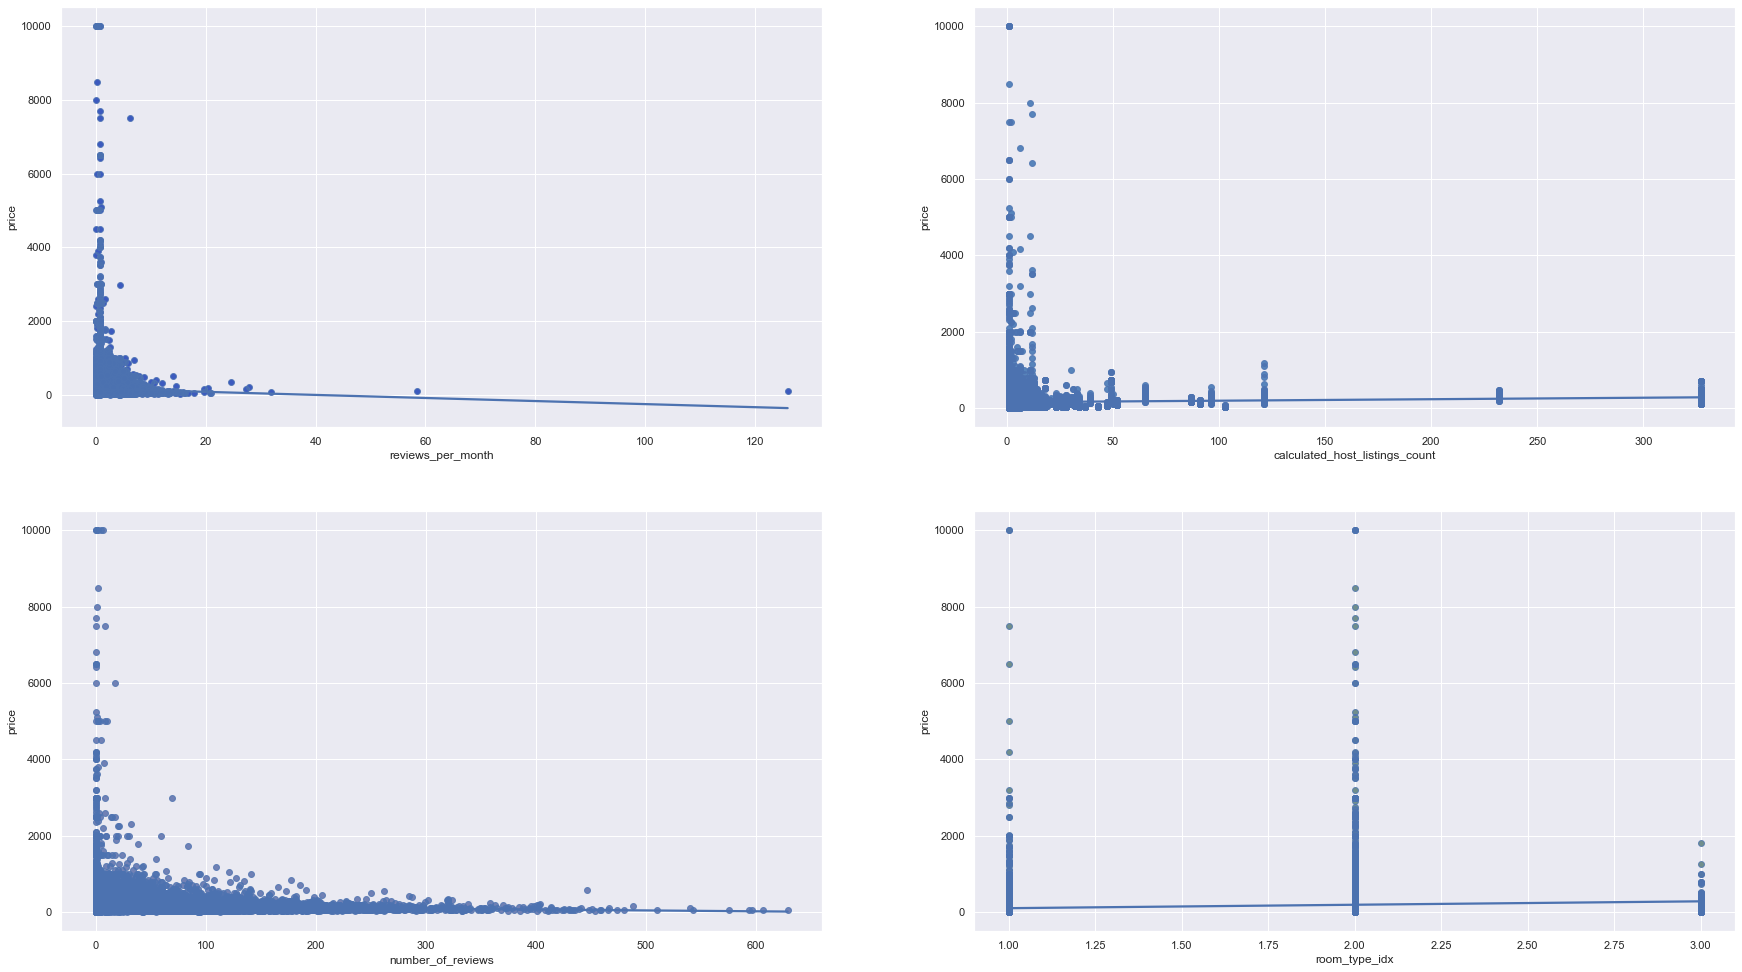

In [50]:
fig, ax = plt.subplots(2,2,figsize=(30,17))
sns.scatterplot(data=df2, x="reviews_per_month", y="price",ax=ax[0,0], color="blue")
sns.regplot(data=df2, x="reviews_per_month", y="price",ax=ax[0,0], ci=None)

sns.scatterplot(data=df2, x="calculated_host_listings_count", y="price",ax=ax[0,1], color="skyblue")
sns.regplot(data=df2, x="calculated_host_listings_count", y="price",ax=ax[0,1], ci=None)

sns.scatterplot(data=df2, x="number_of_reviews", y="price",ax=ax[1,0], color="pink")
sns.regplot(data=df2, x="number_of_reviews", y="price",ax=ax[1,0], ci=None)

sns.scatterplot(data=df2, x="room_type_idx", y="price",ax=ax[1,1], color="yellow")
sns.regplot(data=df2, x="room_type_idx", y="price",ax=ax[1,1], ci=None)

**Nhận xét:** Ta thấy được hầu như các điểm đều phân bổ xung quanh đường thẳng tương quan, nên ta có thể giả thuyết rằng, cả 3 thuộc tính `number_of_reviews`, `calculated_host_listings_count`,`reviews_per_month` đều có khả năng ảnh hưởng đến `price` theo hướng tiêu cực hoặc tích cực
* Riêng `room_type` thì vẫn có khả năng vì tương đối các điểm giá trị không phân bố quá rộng xung quanh đường thẳng

<font size=5>TRỰC QUAN CÁC THUỘC TÍNH TRONG DATASET 2</font>

**Tìm hiểu mối quan hệ giữa `property_type` và `price`**

Text(0.5, 0.98, 'Property Price, according to property type')

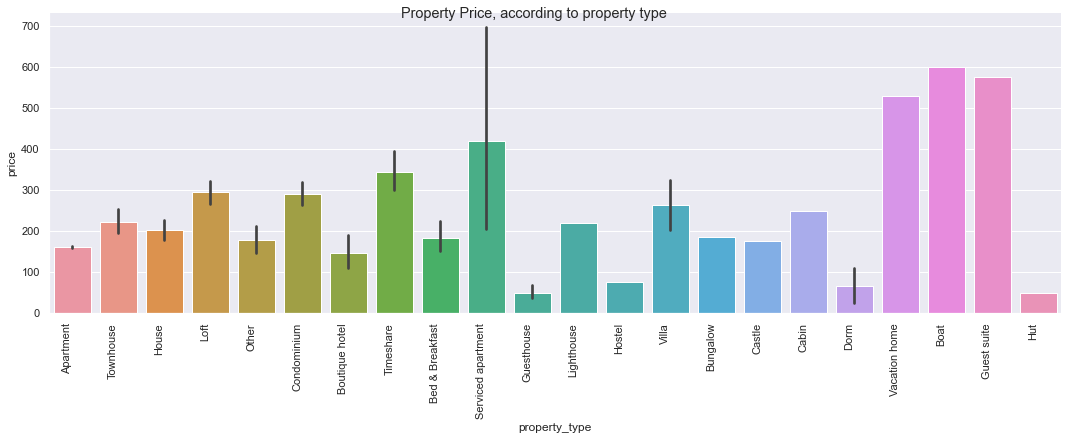

In [51]:
cpsl=sns.catplot(x='property_type', y='price', kind ='bar', data= df_2, aspect=3)

cpsl.set_xticklabels(rotation=90, horizontalalignment='right')

cpsl.fig.suptitle("Property Price, according to property type")


**Nhận xét:** Biểu đồ cho thấy giá phòng có sự dao rộng không quá rộng dựa trên loại phòng.
* Loại phòng In-Law, Hotel, LightHouse,.. có giá dao động trong khoảng từ $200 - $300, điều này có thể thấy du khách có nhu cầu chọn ở trong những phòng này hơn những phòng khác.
- Những vị trí như Tent, Hostel có giá chỉ dao động từ $10-$50

**Mối quan hệ giữa `bed_type`, `room_type` và `price`**

Text(0.5, 1.1, 'Property Price, according to Room Type & Bed Type')

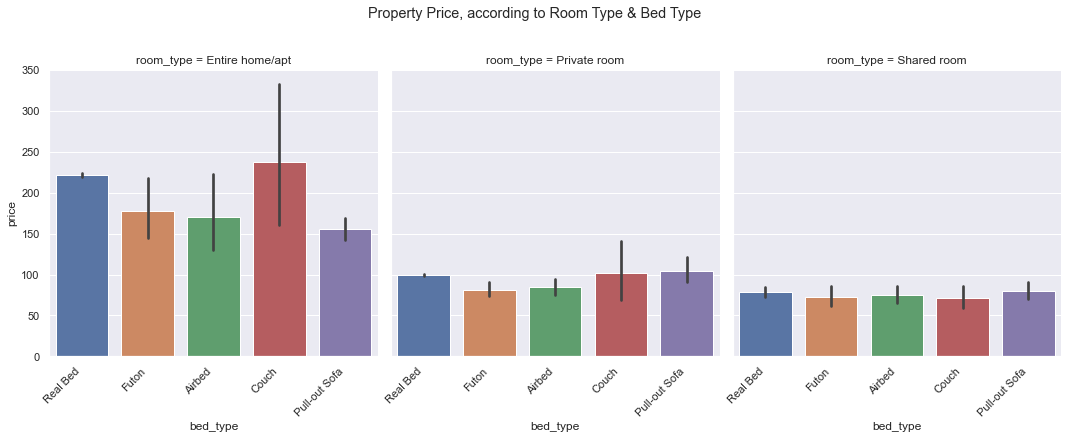

In [52]:
csrpl = sns.catplot(x='bed_type', y='price', col ='room_type', kind= 'bar', data=df_2)
csrpl.set_xticklabels(rotation=45, horizontalalignment='right')
csrpl.fig.suptitle("\n".join(["Property Price, according to Room Type & Bed Type"]), y=1.1)

**Nhận xét:** Nhìn chung giá của từng loại có phạm vi dao động đến tối đá $200.
* Đối với loại phòng Entire thì giá của mỗi loại giường sẽ có mức cao hơn so với loại phòng khác.
* Đối với khách du lịch có thể thấy sẽ ưu tiên chọn những phòng thoải mái như Entire room, vì thể có thể nói đây là lí do mà giá giường của loại phòng này cao nhất.
* Loại giường *Couch* có giá thấp nhất. Trong khi đó *Futon* trong cả 3 loại phòng đều xếp thứ hạng cao, điều này có nghĩa *Futon* sẽ được nhiều du khách lựa chọn.
* Loại giường *Real Bed* cũng được ưa chuộng vì mức giá gần tương đương với mức giá cao nhất trong các loại giường của các phòng.
* Tuy giá giường *Airbed* và *Pull-out Sofa** có sự chênh lệch nhưng không đáng kể.

**Mối quan hệ giữa giá của `beds`, `bathrooms` và `price`**

Text(0.5, 1.1, 'Relationship with beds & bathrooms')

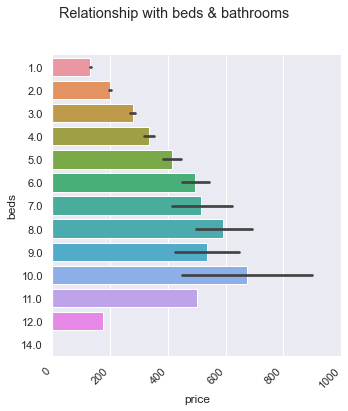

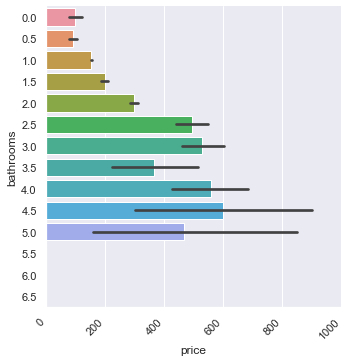

In [53]:
cbsl =sns.catplot (x='price', y='beds', orient ='h', kind ='bar', data= df_2)
cbsl2 =sns.catplot (x='price', y='bathrooms', orient ='h', kind ='bar', data= df_2)

cbsl.set_xticklabels(rotation =45, horizontalalignment='right')
cbsl2.set_xticklabels(rotation =45, horizontalalignment='right')

cbsl.fig.suptitle("\n".join(["Relationship with beds & bathrooms"]), y=1.1)


**Nhận xét**: Theo đồ thấy ta thấy được số lượng giường và số lượng bathroom có sự tương tác, khi số lượng giường và bathroom khách cần càng cao thì giá càng cao. 
* Tuy nhiên tại vị trí bathroom = 6.5-7 và beds = 11 thì sự tương quan thay đổi ngược lại, không tiếp tục tỉ lệ thuận với giá nữa. Điều này chúng ta có thể đưa ra giả thuyết đối với những khách hàng đặt phòng từ 6.5-7 bathroom và beds > 12 thì sẽ nhận voucher giảm giá nhóm, vì thế giá tiền giảm

**Mối quan hệ giữa `bedrooms`, `accommodates` và `price`**

Text(0.5, 1.1, 'Relationship with bedrooms & accomodates')

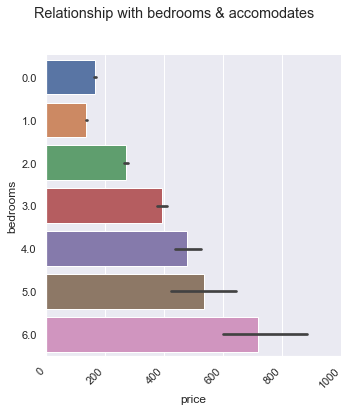

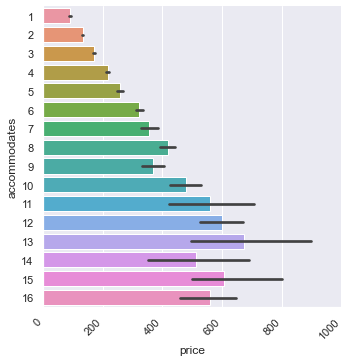

In [54]:
cbsl3 =sns.catplot (x='price', y='bedrooms', orient ='h', kind ='bar', data= df_2)
cbsl4 =sns.catplot (x='price', y='accommodates', orient ='h', kind ='bar', data= df_2)

cbsl3.set_xticklabels(rotation =45, horizontalalignment='right')
cbsl4.set_xticklabels(rotation =45, horizontalalignment='right')

cbsl3.fig.suptitle("\n".join(["Relationship with bedrooms & accomodates"]), y=1.1)

**Nhận xét:** 

<font size=5>SCATTER PLOT</font>

**Sự tương quan giữa `accommodates`, `beds`,`bathroom`,`bedrooms` và `price`**

In [55]:
df3 = df_2[['beds','room_type','property_type','price','accommodates','bathrooms', "bedrooms"]]
# df4 = df3[df3['property_type']=='House']
# df4

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

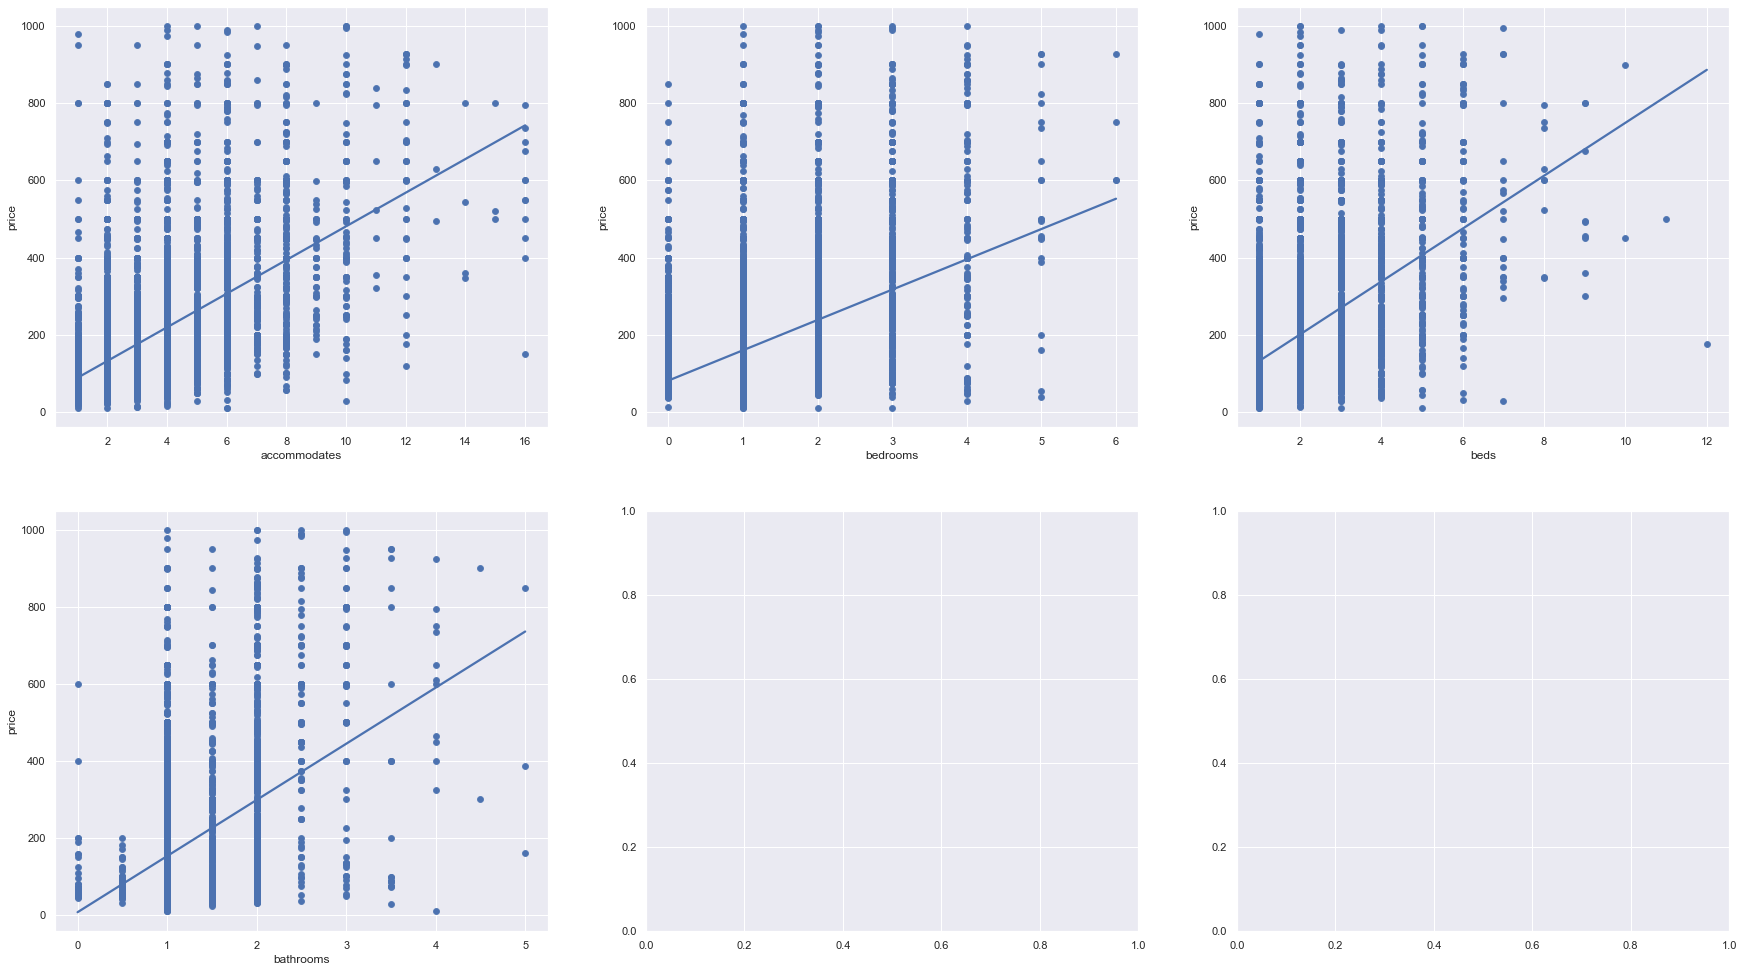

In [56]:
fig, ax = plt.subplots(2,3,figsize=(30,17))
sns.scatterplot(data=df3, x="accommodates", y="price",ax=ax[0,0])
sns.regplot(data=df3, x="accommodates", y="price",ax=ax[0,0], ci=None)

sns.scatterplot(data=df3, x="bedrooms", y="price", ax=ax[0,1])
sns.regplot(data=df3, x="bedrooms", y="price", ax=ax[0,1], ci=None)
   
sns.scatterplot(data=df3, x="beds", y="price", ax=ax[0,2])
sns.regplot(data=df3, x="beds", y="price", ax=ax[0,2], ci=None)

sns.scatterplot(data=df3, x="bathrooms", y="price", ax=ax[1,0])
sns.regplot(data=df3, x="bathrooms", y="price", ax=ax[1,0], ci=None)

**Nhận xét:** Đối với các dữ liệu về sức chứa `accommodates`, số lượng phòng ngủ `bedrooms`, số lượng giường ngủ `beds` và số lượng phòng tắm `bathrooms` không có sự tương quan quá nhiều tới `price`.
* Ta có thể thấy đối với sức chứa accommodates, số lượng bed, bathroom, bedroom ít thì sẽ có nhiều mức giá trãi rộng. 
* Đối với accommodates (sức chứa) có mức giá trãi rộng, sự phân bố tập trung chủ yếu từ 1-10 với khoảng giá rộng tương đối đến dưới $500. Vẫn tồn tại giá cao hơn nhưng không chủ yếu. Với sức chứa > 10, giá phân bổ rải rác từ thấp đến cao, ít được lựa chọn.

* Với bedrooms, số lượng phòng ngủ chủ yếu là từ 0-4 phòng với giá chủ yếu dưới $600. Với số lường phòng ngủ từ 5-6 thì có ít khách hàng chọn hơn.

* Đối với beds, ta có thể thấy số lượng giường chủ yếu từ 1-8 giường với giá dao động từ $100-$1000. Đối với số lượng giường cao hơn thì có nhiều phổ giá rộng, mà thay vào đó giá tiền sẽ phân bố rãi rác từ $200 và sẽ ít được ưa chuộng.

* Với bathrooms, số lượng phòng tắm là 1 được nhiều người lựa chọn vì sự tiện dụng và giúp giảm chi phí, và mức giá trãi rộng. Tuy vậy, vẫn có nhiều sự lựa chọn cho số lượng phòng từ 2-3, và mức giá sẽ chủ yếu từ $100-$600.


**Xem xét sự tương quan giữa các điểm review và điểm rating `review_score_rating`, `review_score_value`, `review_scores_cleanliness`,`review_scores_accuracy`,`review_scores_checkin`**

In [57]:
df_2.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'experiences_offered', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_response_time', 'host_response_rate',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'first_

<AxesSubplot:xlabel='review_scores_value', ylabel='review_scores_rating'>

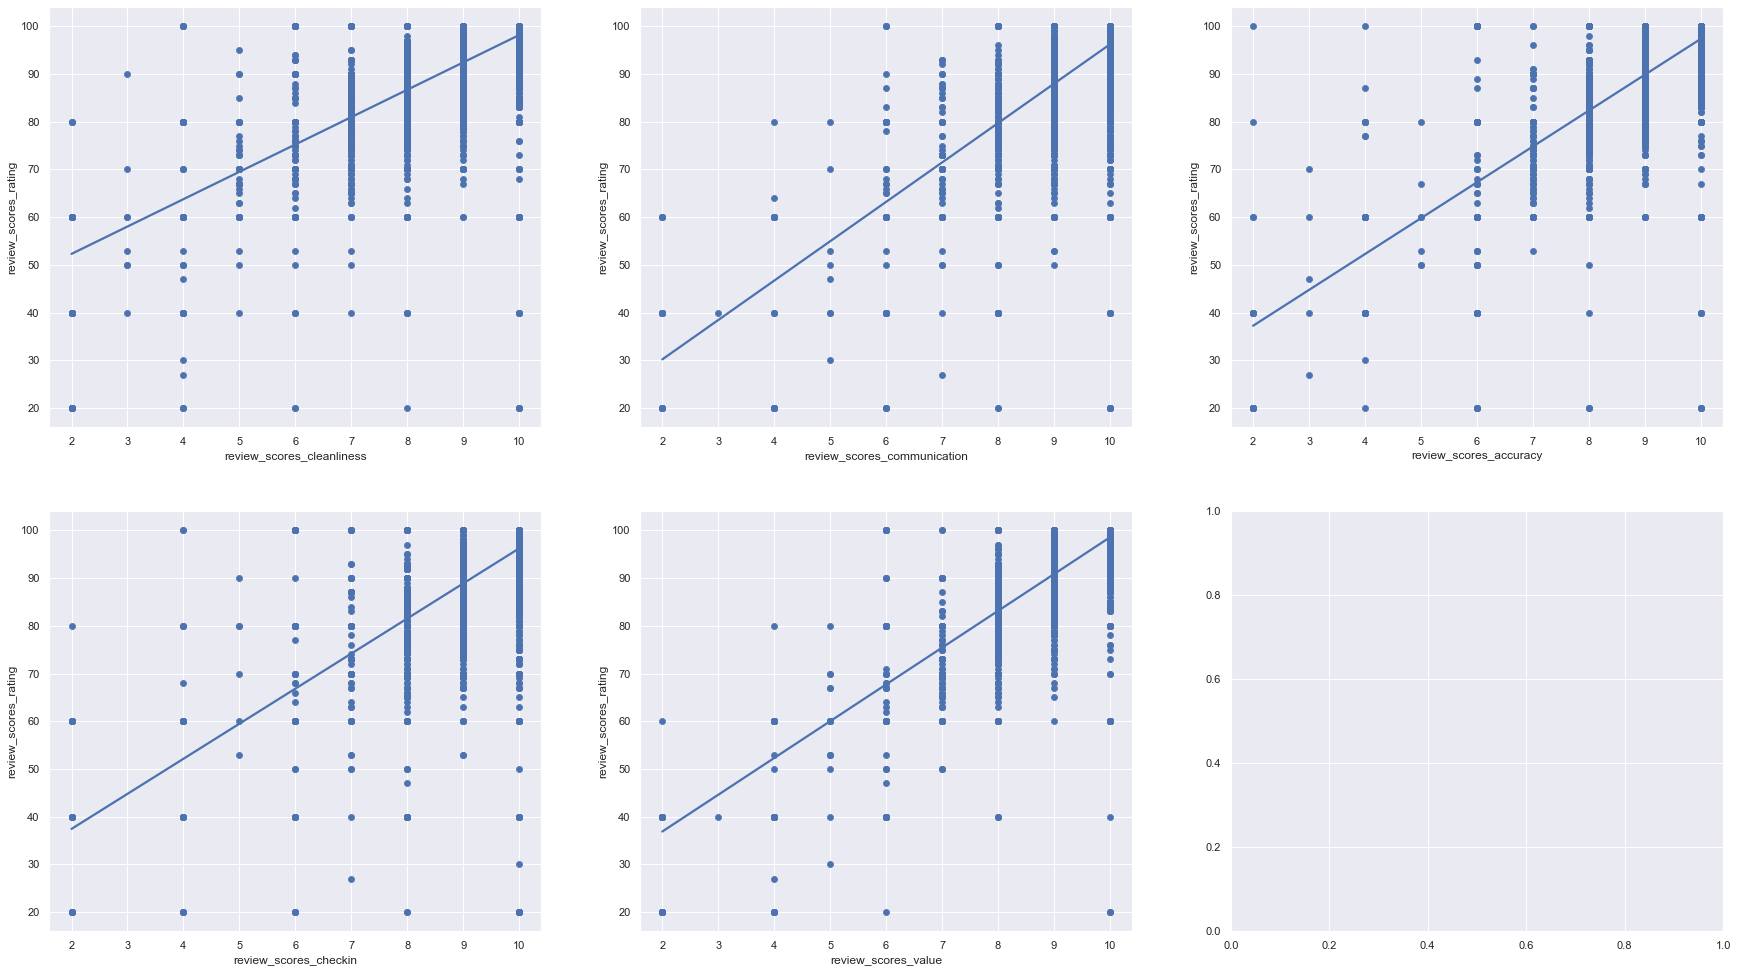

In [58]:
fig, ax = plt.subplots(2,3,figsize=(30,17))
sns.scatterplot(data=df_2, x="review_scores_cleanliness", y="review_scores_rating",ax=ax[0,0])
sns.regplot(data=df_2, x="review_scores_cleanliness", y="review_scores_rating",ax=ax[0,0], ci=None)

sns.scatterplot(data=df_2, x="review_scores_communication", y="review_scores_rating",ax=ax[0,1])
sns.regplot(data=df_2, x="review_scores_communication", y="review_scores_rating",ax=ax[0,1], ci=None)

sns.scatterplot(data=df_2, x="review_scores_accuracy", y="review_scores_rating",ax=ax[0,2])
sns.regplot(data=df_2, x="review_scores_accuracy", y="review_scores_rating",ax=ax[0,2], ci=None)

sns.scatterplot(data=df_2, x="review_scores_checkin", y="review_scores_rating",ax=ax[1,0])
sns.regplot(data=df_2, x="review_scores_checkin", y="review_scores_rating",ax=ax[1,0], ci=None)

sns.scatterplot(data=df_2, x="review_scores_value", y="review_scores_rating",ax=ax[1,1])
sns.regplot(data=df_2, x="review_scores_value", y="review_scores_rating",ax=ax[1,1], ci=None)

**Nhận xét:** Nhìn chung, dữ liệu về review có sự tương quan với điểm rating
* Các điểm giá trị tập trung tương đối xung quanh đường thẳng tương quan, tuy nhiên độ tương quan không cao.
* Các điểm review tập trung từ thang điểm từ 7-10, khi điểm của các loại đánh giá cao cũng ảnh hưởng đến điểm rating.

**Xét mối quan hệ tương quan giữa `cleaning_fee` và `price`**

<AxesSubplot:xlabel='cleaning_fee', ylabel='price'>

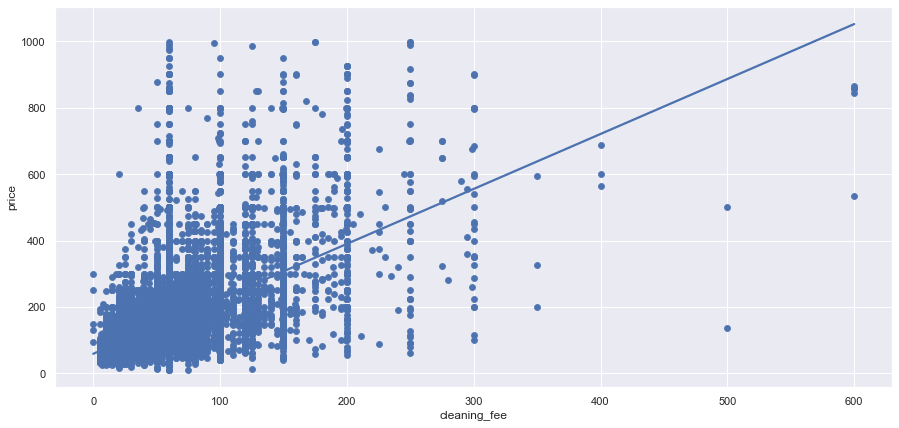

In [59]:
fig= plt.figure(figsize=(15,7))
sns.scatterplot(data=df_2, x="cleaning_fee", y="price")
sns.regplot(data=df_2, x="cleaning_fee", y="price", ci=None)

**Nhận xét:** Theo biểu đồ ta thấy được, có sự tương quan giữa `cleaning_free` và `price`
* Khi cleaning_fee tăng sẽ dẫn đến price tăng, có thể giả thuyết du khách sẽ bỏ ra chi phí cao cho dịch vụ dọn phòng để có thể được trãi nghiệm được tốt nhất. 

<font size=5>HEAT MAP</font>

In [60]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt


In [61]:
df2_corr = df2.corr()
df2_corr

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_idx
id,1.000000,0.614965,-0.105570,0.044603,-0.005537,0.013233,-0.272915,0.183622,0.152013,0.033037,-0.037280
host_id,0.614965,1.000000,-0.043085,0.042691,0.007181,-0.001607,-0.123112,0.205461,0.166455,0.153971,-0.037031
latitude,-0.105570,-0.043085,1.000000,0.437876,0.005845,-0.001642,-0.033170,-0.016987,-0.009441,0.014029,-0.016515
longitude,0.044603,0.042691,0.437876,1.000000,-0.039906,-0.008314,0.017319,0.026881,-0.019907,0.019192,-0.041442
price,-0.005537,0.007181,0.005845,-0.039906,1.000000,0.034936,-0.044721,-0.030221,0.051295,0.085203,0.227757
minimum_nights,0.013233,-0.001607,-0.001642,-0.008314,0.034936,1.000000,-0.069360,-0.096249,0.123584,0.113376,0.053485
number_of_reviews,-0.272915,-0.123112,-0.033170,0.017319,-0.044721,-0.069360,1.000000,0.543572,-0.058812,0.184475,-0.023543
reviews_per_month,0.183622,0.205461,-0.016987,0.026881,-0.030221,-0.096249,0.543572,1.000000,-0.019998,0.165267,-0.025616
calculated_host_listings_count,0.152013,0.166455,-0.009441,-0.019907,0.051295,0.123584,-0.058812,-0.019998,1.000000,0.188909,0.075534
availability_365,0.033037,0.153971,0.014029,0.019192,0.085203,0.113376,0.184475,0.165267,0.188909,1.000000,0.014204


Text(0.5, 1.0, 'Seaborn')

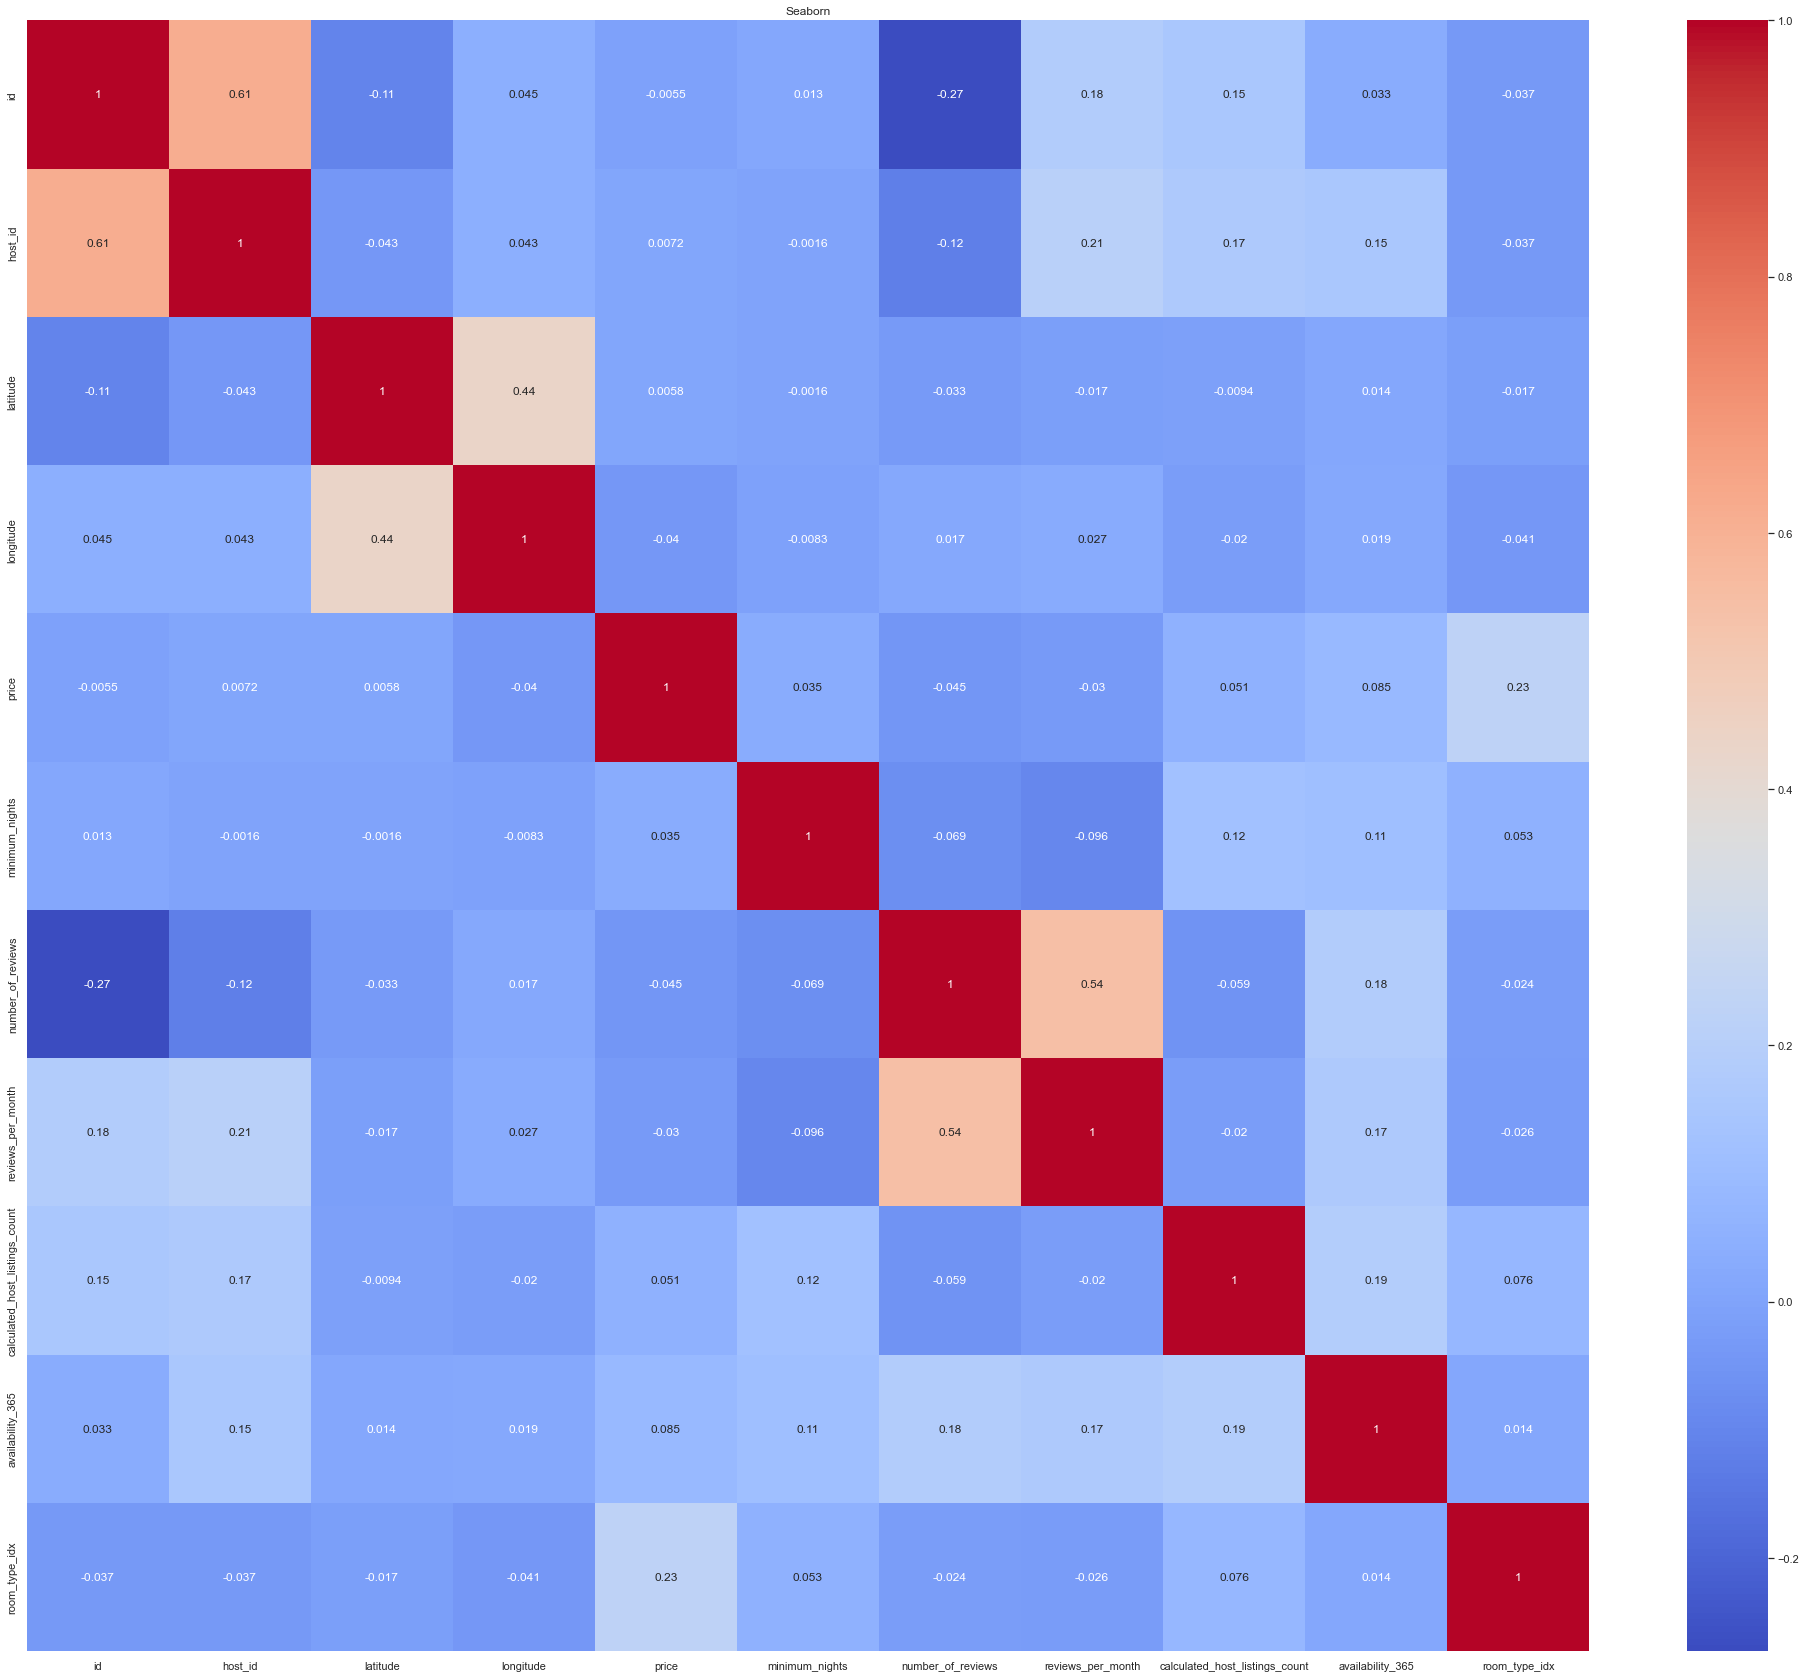

In [62]:
plt.figure(figsize=(35,30))
seaborn.heatmap(df2_corr, annot=True, cmap="coolwarm").set_title('Seaborn')


**Nhận xét:**
- Kết hợp số liệu thống kê và heatmap, ta nhận thấy rằng Price và các thuộc tính khác của tập dữ liệu có độ tương quan rất thấp: tất cả độ tương quan trên hàng và cột Price đều có giá trị thấp hơn 0.1 (ngoại trừ tương quan với chính nó)
- Giữa các biến còn lại cũng có độ tương quan không cao, chỉ 1 vài cặp có độ tương quan cao hơn 0.5:
  - id và host_id
  - number of reviews và reviews per month.

Heatmap trên dataset là nguồn dữ liệu 2:


In [63]:
import numpy as np

data2_numeric = df_2.select_dtypes(include= np.number)
data2_corr = data2_numeric.corr()
data2_corr

,id,scrape_id,host_id,host_response_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
id,1.000000,NaN,0.541155,-0.044042,0.006959,0.006959,0.024617,0.013844,0.009288,0.008915,...,-0.388876,0.098045,0.077393,0.104967,0.037482,0.006150,0.109531,0.132286,0.022290,0.111694
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.541155,NaN,1.000000,-0.031385,0.001428,0.001428,0.058882,0.043658,0.050823,0.021653,...,-0.177529,-0.011420,-0.019109,0.018261,-0.027384,-0.058156,0.021880,0.023546,0.023310,0.128728
host_response_rate,-0.044042,NaN,-0.031385,1.000000,0.006353,0.006353,0.024788,0.026388,0.013505,0.002149,...,0.044118,0.054798,0.046224,0.047809,0.052563,0.079468,0.016947,0.046114,-0.008386,0.051595
host_listings_count,0.006959,NaN,0.001428,0.006353,1.000000,1.000000,-0.012988,-0.018780,0.014292,0.012062,...,-0.014017,0.004626,-0.005657,0.009052,0.001955,-0.002425,-0.000044,-0.001500,0.254620,-0.008538
host_total_listings_count,0.006959,NaN,0.001428,0.006353,1.000000,1.000000,-0.012988,-0.018780,0.014292,0.012062,...,-0.014017,0.004626,-0.005657,0.009052,0.001955,-0.002425,-0.000044,-0.001500,0.254620,-0.008538
latitude,0.024617,NaN,0.058882,0.024788,-0.012988,-0.012988,1.000000,0.788814,-0.052142,-0.016712,...,-0.029589,-0.014911,0.000453,-0.001076,-0.010498,-0.014083,-0.246282,0.014462,-0.008695,-0.022855
longitude,0.013844,NaN,0.043658,0.026388,-0.018780,-0.018780,0.788814,1.000000,-0.054220,-0.022670,...,-0.016794,-0.036715,-0.011003,-0.019768,-0.020335,-0.017628,-0.310375,-0.007694,-0.006025,-0.017923
accommodates,0.009288,NaN,0.050823,0.013505,0.014292,0.014292,-0.052142,-0.054220,1.000000,0.391381,...,0.099292,-0.070754,-0.067070,-0.019038,-0.058531,-0.070987,-0.049599,-0.082128,-0.031092,0.119670
bathrooms,0.008915,NaN,0.021653,0.002149,0.012062,0.012062,-0.016712,-0.022670,0.391381,1.000000,...,-0.007308,0.038722,0.019142,0.033536,0.007542,-0.001935,0.010423,0.023991,-0.058199,0.010794


Text(0.5, 1.0, 'Seaborn')

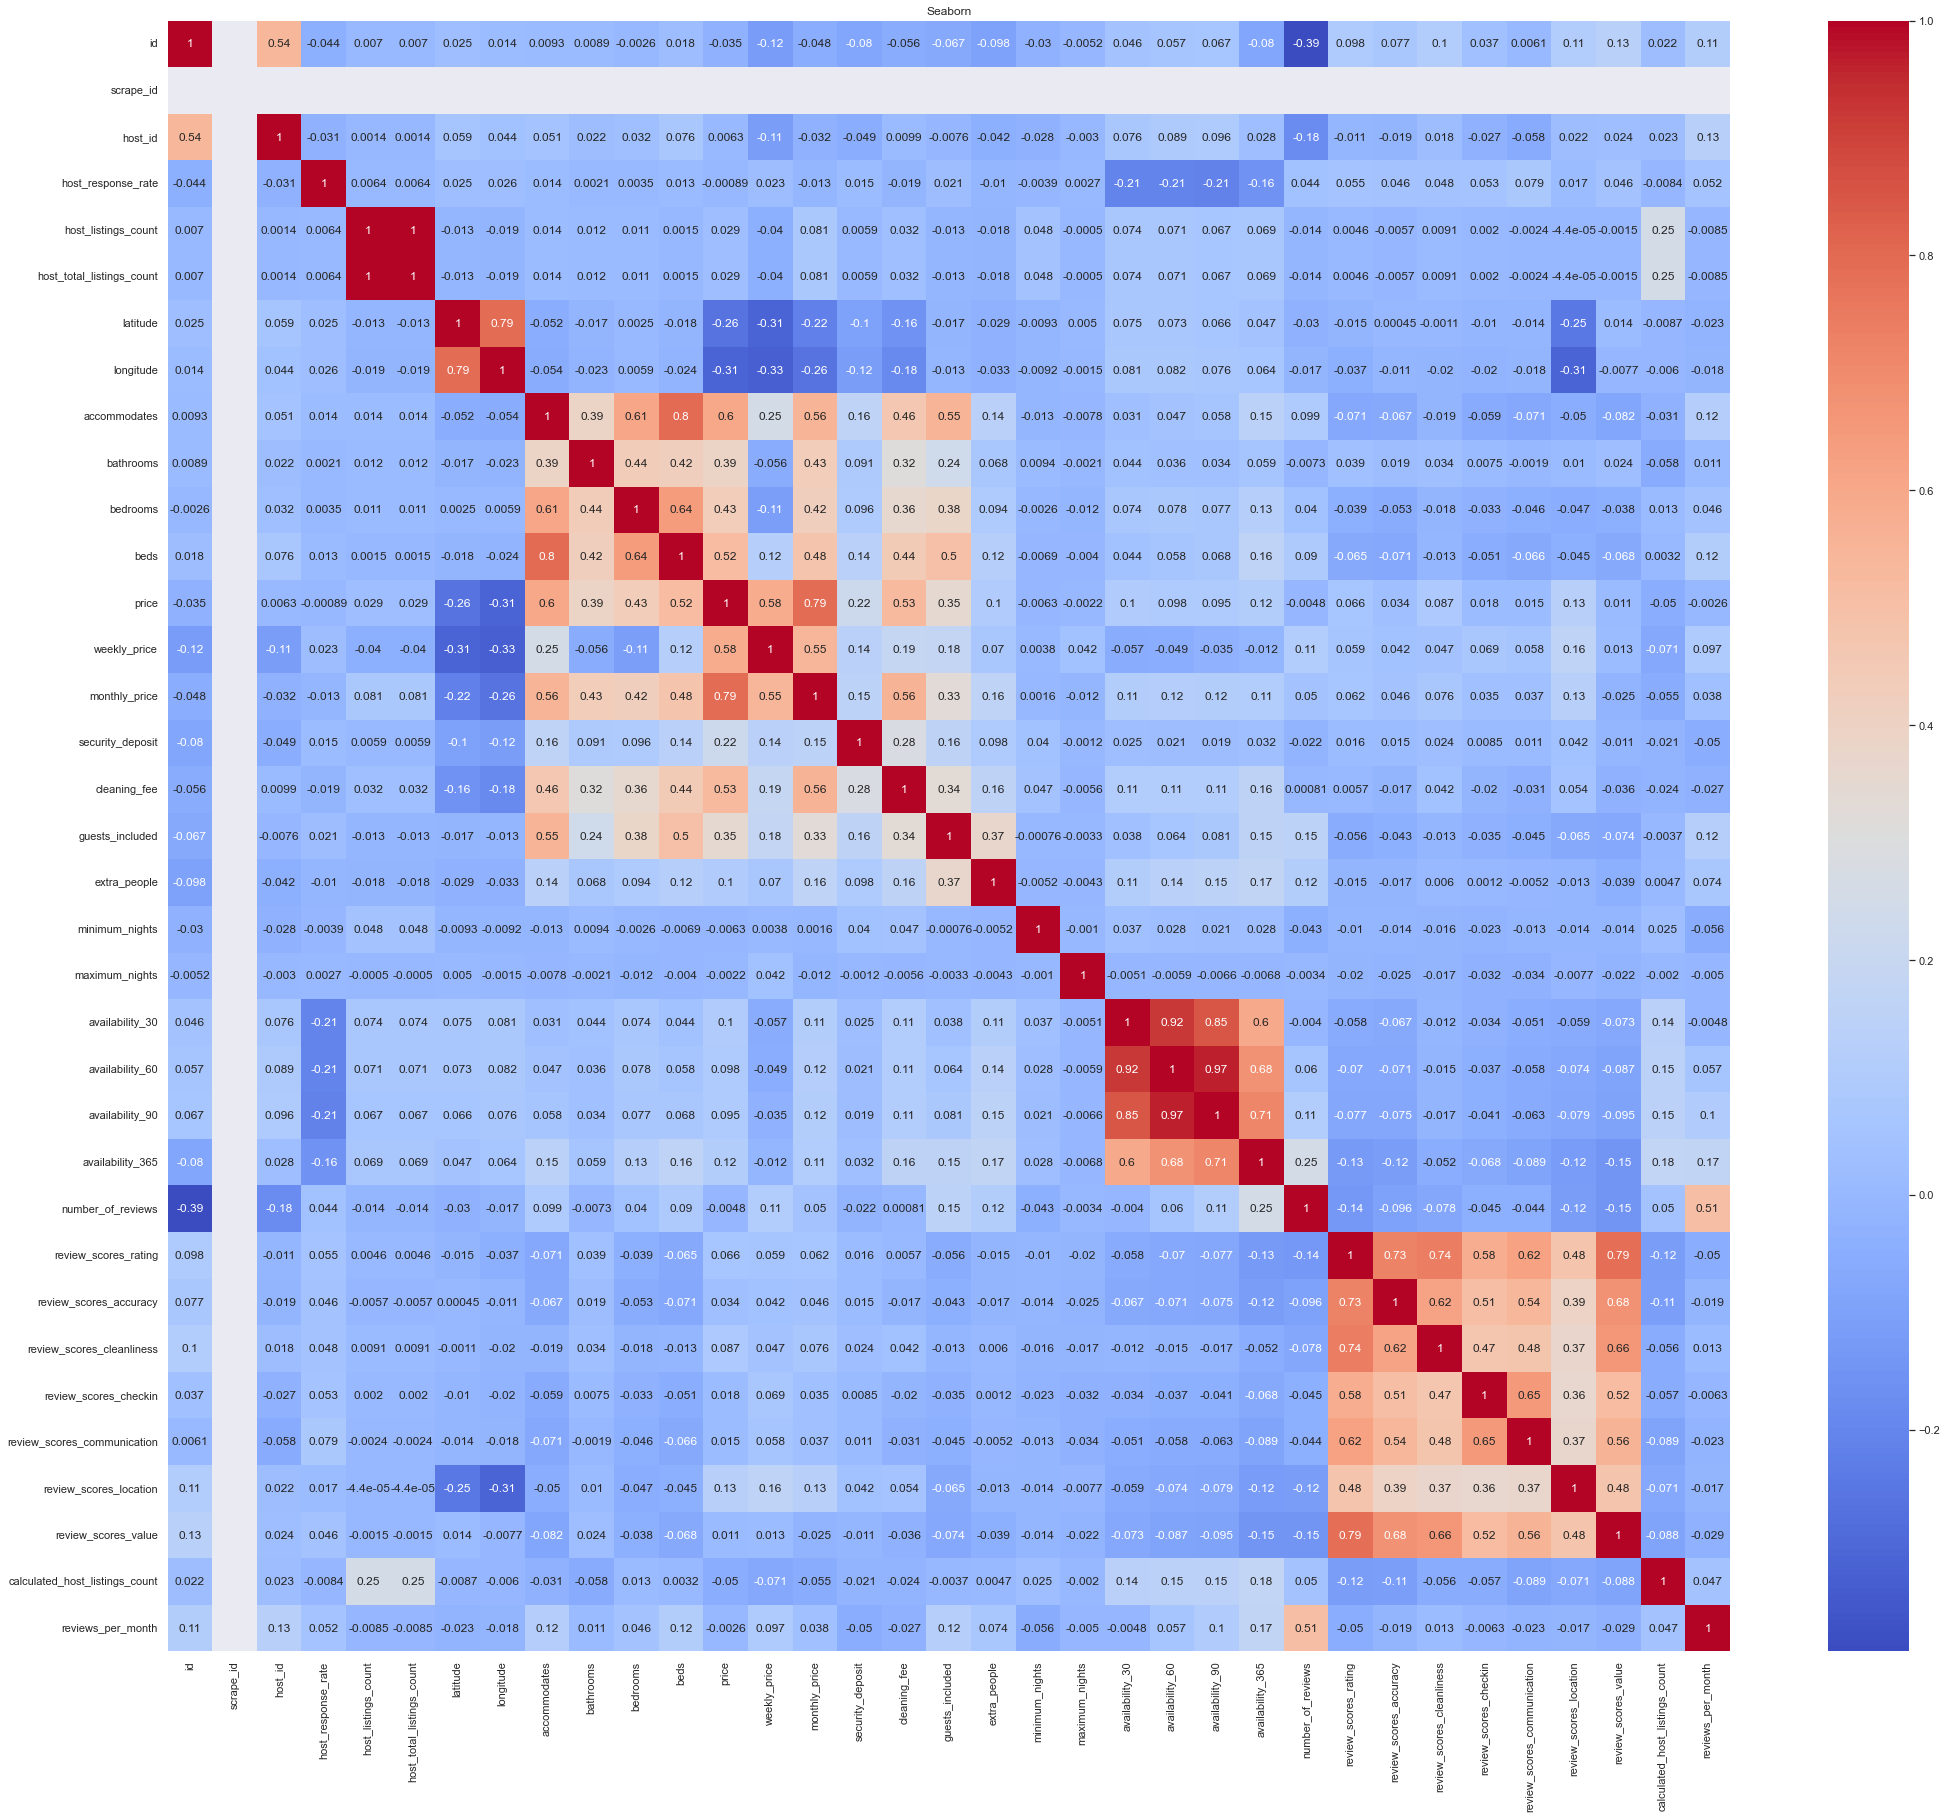

In [64]:
plt.figure(figsize=(35,30))
seaborn.heatmap(data2_corr, annot=True, cmap="coolwarm").set_title('Seaborn')

Với ma trận tương quan và heatmap trên tập dataset 2, ta thấy rõ tập dữ liệu phân thành 3 mức tương quan chính:
- Nhóm tương quan rất cao: các ô có màu da đậm và màu đỏ:
  - Availability 90 với Availability 60 (độ tương quan cao nhất trong heatmap = 0.97)
  - Availability 90 với Availability 30 (0.85)
- Nhóm tương quan thấp: các ô với sắc xanh đậm (nằm trong khoảng 0.1 đến 0.5) có mức độ tương quan thấp
  - review_score_location với latitude và longitude
- Nhóm tương quan rất thấp: các ô sắc xanh nhạt mang độ tương quan rất thấp (dưới 0.1):
  - calculated_host_listing_count và host_id

#Dự đoán thuộc tính:

- Các đặc trưng không liên quan tới dự đoán giá phòng:
  'latitude', 'id', 'scrape_id', 'host_id', 'longitude', 'extra_people','guests_included','monthly_price','weekly_price'
- Cách xử lý: xóa cột

- Các đặc trưng liên quan đến dự đoán giá phòng:

In [65]:
import numpy as np

numeric_data = high_price_2.select_dtypes(include= np.number)
corr_dict = dict.fromkeys(numeric_data.columns,0)
for col in numeric_data.columns:
  corr_dict[col] = round(np.corrcoef(numeric_data[col],numeric_data['price'])[1,0],2)
 
sorted_corr_list = sorted(corr_dict.items(), key=lambda x:x[1],reverse = True)
sorted_corr_dict = dict(sorted_corr_list)
for key, value in sorted_corr_dict.items():
    if value > 0:
      print(key, ' : ', value)


price  :  1.0
accommodates  :  0.58
beds  :  0.51
cleaning_fee  :  0.51
bedrooms  :  0.42
bathrooms  :  0.37
guests_included  :  0.34
monthly_price  :  0.24
security_deposit  :  0.22
weekly_price  :  0.18
review_scores_location  :  0.13
availability_365  :  0.12
extra_people  :  0.1
availability_30  :  0.1
availability_60  :  0.1
availability_90  :  0.09
review_scores_cleanliness  :  0.09
review_scores_rating  :  0.07
host_listings_count  :  0.03
host_total_listings_count  :  0.03
review_scores_accuracy  :  0.03
review_scores_checkin  :  0.02
review_scores_communication  :  0.02
host_id  :  0.01
review_scores_value  :  0.01


c:\Users\Kiwine\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Kiwine\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Trong số các thuộc tính kiểu số thì độ tương quan với thuộc giá khá thấp. Chỉ có accomodates, beds và cleaning_fee là cao hơn 0.5 nhưng không nhiều.

<font size=5>LỰA CHỌN MÔ HÌNH, ĐẶC TRƯNG CHO THUẬT TOÁN</font>

Nhận xét:

- Price là biến liên tục --> Không sử dụng phân lớp (cây quyết định, KNN, SVM)
- Price là thuộc tính đã biết, có giá trị --> Sử dụng thuật toán học có giám sát --> Không sử dụng gom cụm (unsupervised)
--> Sử dụng mô hình hồi quy

Nhận thấy sau khi phân tích tương quan có > 1 thuộc tính có ảnh hưởng đến price --> Sử dụng mô hình hồi quy đa biến

* Sử dụng cả 2 dataset khi đã xử lý giá theo 2 cách, có 10 thuộc tính đã xử lý missing value để tìm đặc trưng ảnh hưởng đến `price`

Phương pháp lựa chọn mô hình:
Dùng phương pháp stepwise để duyệt và chọn tập thuộc tính tốt nhất để đưa vào mô hình hồi quy đa biến

In [66]:
import statsmodels.api as sm

def stepwise_selection (X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose = True):
    included = list(initial_list)
    while True:
        changed=False
        #forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add {:40} with p-value: {:0.6}' .format(best_feature, best_pval))

        #backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        #use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() #null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:40} with p-value {:0.6}' .format(worst_feature, worst_pval))
        if not changed:
            break
    return included




**Code mô hình thuật toán HỒI QUI**

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import numpy as np

# Sử dụng mô hình lasso
# Phương pháp Lasso được xem là phương pháp cải tiến của OLS.
# Phương pháp này đưa thêm tham số lamda vào hàm lỗi để điều chỉnh ảnh hưởng
# của hệ số góc trong phương trình hồi quy, nhằm tăng tính diễn giải của mô hình
def regr(model, x,y, key=None):

    # Chia data thành 2 phần train và test theo tỷ lệ 7/3
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)

    if (key == 'CV'):
      print('lamda: ', model.alpha_)
    print('R-Square: ', model.score(x,y))
    print('Mean-Square-Error: ', np.mean((y_pred - y_test)**2))
    print('intercept: ', model.intercept_)
    print()
    #Cross validation score
    scores = cross_val_score(model,x_test,y_pred, cv=5,)
    print('Cross value score: ', scores)
    print()

    coef = pd.DataFrame()
    coef['cols'] = x_test.columns
    coef['coef']=pd.Series(model.coef_)
    print(coef)
    print() 
    
    df_pred = x_test.copy()
    df_pred['y'] = y_test
    df_pred['y_pred']=y_pred
    print(df_pred)

from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=5, n_repeats = 5, random_state = 1)
LassoCV = LassoCV(cv=cv)

In [68]:
data2['Property Type'].unique()

array(['Apartment', 'Townhouse', 'House', 'Loft', 'Other', 'Condominium',
       'Boutique hotel', 'Timeshare', 'Bed & Breakfast',
       'Serviced apartment', 'Guesthouse', 'Lighthouse', 'Hostel',
       'Villa', 'Bungalow', 'Castle', 'Cabin', 'Dorm', 'Vacation home',
       'Boat', 'Guest suite', 'Hut'], dtype=object)

<font size=5>KIỂM TRA DATASET 2</font>

**Hàm chuyển dữ liệu category sang numeric**

In [69]:
from sklearn.preprocessing import LabelEncoder
def convert_Categorical(data, att):
  le = LabelEncoder()
  for col in att:
    label = le.fit_transform(data[col])

    data.drop(col, axis=1, inplace=True)

    data[col] = label

def check_Categorical_Att(data):
  cate = dict.fromkeys(data.columns,0)
  for col in data.columns:
    cate[col] = len(data[col].unique())

  sorted_cate_list = sorted(cate.items(), key=lambda x:x[1],reverse = False)

  sorted_cate = dict(sorted_cate_list)
  cate_list = []

  for key, value in sorted_cate.items():
    if value > 0:
      print(key, ' : ', value)
    if value < 400:
      cate_list.append(key)
  return cate_list

**Xử lý những thuộc tính phân loại**

In [70]:
#Lọc những thuộc tính category có thể ảnh hưởng đến giá theo quan sát thực tế
object_data = high_price_2.select_dtypes(include=['object'])

#Kiểm tra giá trị của mối dữ liệu object
category_2 = check_Categorical_Att(object_data)


experiences_offered  :  1
city  :  1
state  :  2
country_code  :  2
country  :  2
room_type  :  3
last_scraped  :  4
host_response_time  :  4
smart_location  :  4
calendar_last_scraped  :  4
cancellation_policy  :  4
neighbourhood_group_cleansed  :  5
bed_type  :  5
market  :  10
property_type  :  22
features  :  50
calendar_updated  :  56
neighbourhood  :  75
neighbourhood_cleansed  :  87
host_neighbourhood  :  192
zipcode  :  195
street  :  387
host_verifications  :  399
host_location  :  745
last_review  :  876
first_review  :  1774
host_since  :  2570
host_name  :  5715
host_url  :  15745
amenities  :  16005
summary  :  17441
name  :  17591
listing_url  :  17881
geolocation  :  17881


**Nhận xét**: Từ dữ liệu trên có thể sử dụng 1 vài thuộc tính dữ liệu mang tính chất phân loại: `room_type`,`bed_type`,`property_type`,`neighbourhood`,`market`

**Data xử lý theo giá cao**

In [71]:
#Chuyển thuộc tính category sang numeric để áp dụng cho mô hình lựa chọn đặc trưng
selected_cate_2 = ['room_type','bed_type','property_type','neighbourhood','market']
convert_Categorical(high_price_2,selected_cate_2)

#Lọc các thuộc tính có kiểu dữ liệu numeric để áp dụng cho mô hình chọn lọc
df_high_2_num = high_price_2.select_dtypes(include=np.number)

#Loại bỏ những thuộc tính numeric không có ý nghĩa thống kê đến `price`
df_high_2_num = df_high_2_num.drop(['latitude','id','scrape_id','host_id','longitude','extra_people','guests_included','monthly_price','weekly_price'], axis=1)
Y_high = df_high_2_num.price
X_high = df_high_2_num.drop(['price'],axis=1)


print('resulting features:', stepwise_selection(X_high,Y_high))

C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add cleaning_fee                             with p-value: 0.0
Add accommodates                             with p-value: 0.0


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add room_type                                with p-value: 4.11324e-269


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add bathrooms                                with p-value: 2.58746e-156


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add review_scores_location                   with p-value: 5.34611e-104


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add availability_30                          with p-value: 8.83474e-99


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add bedrooms                                 with p-value: 1.31647e-73


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add property_type                            with p-value: 7.38076e-23


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add security_deposit                         with p-value: 8.04472e-17


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add review_scores_cleanliness                with p-value: 4.92614e-09


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add review_scores_value                      with p-value: 1.27501e-07


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add review_scores_rating                     with p-value: 2.34333e-09


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add minimum_nights                           with p-value: 5.84254e-06


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add reviews_per_month                        with p-value: 7.5332e-05


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add host_response_rate                       with p-value: 0.00177059


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add review_scores_checkin                    with p-value: 0.00135342


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


resulting features: ['cleaning_fee', 'accommodates', 'room_type', 'bathrooms', 'review_scores_location', 'availability_30', 'bedrooms', 'property_type', 'security_deposit', 'review_scores_cleanliness', 'review_scores_value', 'review_scores_rating', 'minimum_nights', 'reviews_per_month', 'host_response_rate', 'review_scores_checkin']


**Nhận xét:** Các thuộc tính được lựa chọn để áp dụng cho mô hình: `availability_365`,`number_of_reviews`,`reviews_per_month`,<br> `cleaning_fee`,`bedrooms`,`calculated_host_listings_count`,`accommodates``review_scores_location`,`bathrooms`,`security_deposit`,`availability_30`, <br> `review_scores_cleanliness`,`review_scores_value`,`review_scores_rating`,`minimum_nights`,`review_scores_checkin`, `room_type`, `property_type`

**Áp dụng mô hình hồi qui theo giá cao**

In [72]:
selected_high_X = X_high[['cleaning_fee', 'bedrooms', 'room_type', 'accommodates', 'review_scores_location', 'bathrooms', 'availability_30', 'property_type', 'security_deposit', 'review_scores_cleanliness', 'review_scores_value', 'review_scores_rating', 'minimum_nights', 'reviews_per_month', 'host_response_rate', 'review_scores_checkin']]

regr(LassoCV, selected_high_X,Y_high, 'CV')

lamda:  3.0037365100380047
R-Square:  0.5005794463359632
Mean-Square-Error:  7170.022573349722
intercept:  -161.68657254616136

Cross value score:  [0.97959785 0.98191766 0.97813515 0.98183035 0.98118423]

                         cols       coef
0                cleaning_fee   0.613114
1                    bedrooms  16.531761
2                   room_type -49.669947
3                accommodates  19.712959
4      review_scores_location  11.483988
5                   bathrooms  11.488487
6             availability_30   1.254193
7               property_type   1.937983
8            security_deposit   0.056305
9   review_scores_cleanliness   0.000000
10        review_scores_value  -0.000000
11       review_scores_rating   0.889069
12             minimum_nights  -0.109774
13          reviews_per_month  -0.847914
14         host_response_rate   0.075183
15      review_scores_checkin  -0.000000

       cleaning_fee  bedrooms  room_type  accommodates  \
4036           60.0       0.0         

**Data xử lý theo giá thấp**

In [73]:
#Lọc những thuộc tính category có thể ảnh hưởng đến giá theo quan sát thực tế
object_data = low_price_2.select_dtypes(include=['object'])
#Chuyển thuộc tính category sang numeric để áp dụng cho mô hình lựa chọn đặc trưng
selected_cate_2 = ['room_type','bed_type','property_type','neighbourhood','market']
convert_Categorical(low_price_2,selected_cate_2)

#Lọc những thuộc tính có kiểu numeric
df_low_2_num = low_price_2.select_dtypes(include=np.number)

#Loại bỏ những thuộc tính numeric không có ý nghĩa thống kê đến `price`
df_low_2_num = df_low_2_num.drop(['latitude','id','scrape_id','host_id','longitude','extra_people','guests_included','monthly_price','weekly_price'], axis=1)
Y_low = df_low_2_num.price
X_low = df_low_2_num.drop(['price'],axis=1)

print('resulting features:', stepwise_selection(X_low,Y_low))


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add cleaning_fee                             with p-value: 0.0
Add accommodates                             with p-value: 0.0


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add room_type                                with p-value: 1.95572e-270


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add bathrooms                                with p-value: 9.10731e-139


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add review_scores_location                   with p-value: 6.07683e-100


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add availability_30                          with p-value: 5.16356e-94


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add bedrooms                                 with p-value: 1.66832e-71


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add property_type                            with p-value: 9.06831e-21


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add security_deposit                         with p-value: 2.57203e-17


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add review_scores_cleanliness                with p-value: 1.19443e-08


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add review_scores_value                      with p-value: 1.00062e-07


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add review_scores_rating                     with p-value: 5.06975e-09


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add minimum_nights                           with p-value: 8.31589e-07


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add reviews_per_month                        with p-value: 0.000236011


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add review_scores_checkin                    with p-value: 0.00199966


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add host_response_rate                       with p-value: 0.00207984


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


resulting features: ['cleaning_fee', 'accommodates', 'room_type', 'bathrooms', 'review_scores_location', 'availability_30', 'bedrooms', 'property_type', 'security_deposit', 'review_scores_cleanliness', 'review_scores_value', 'review_scores_rating', 'minimum_nights', 'reviews_per_month', 'review_scores_checkin', 'host_response_rate']


**Nhận xét:** Các thuộc tính được lựa chọn để áp dụng cho mô hình: `reviews_per_month`,`cleaning_fee`,`bedrooms`,`calculated_host_listings_count`, <br>`accommodates`,`review_scores_location`,`bathrooms`,`security_deposit`,`availability_30`, <br> `review_scores_cleanliness`,`review_scores_value`,`review_scores_rating`,`minimum_nights`,`review_scores_checkin`,`room_type`,`property_type`

**Áp dụng mô hình hồi qui theo giá thấp**

In [74]:
selected_low_X = X_low[['cleaning_fee', 'bedrooms', 'room_type', 'accommodates', 'review_scores_location', 'bathrooms', 'availability_30', 'property_type', 'security_deposit', 'review_scores_cleanliness', 'review_scores_value', 'review_scores_rating', 'minimum_nights', 'reviews_per_month', 'host_response_rate', 'review_scores_checkin']]
regr(LassoCV, selected_low_X,Y_low, 'CV')

lamda:  3.194384068686107
R-Square:  0.487221385288096
Mean-Square-Error:  7693.876857232957
intercept:  -135.46273639240383

Cross value score:  [0.98657583 0.98575861 0.98754971 0.98584111 0.98594026]

                         cols       coef
0                cleaning_fee   0.648739
1                    bedrooms  15.462822
2                   room_type -50.796559
3                accommodates  19.259278
4      review_scores_location  10.348652
5                   bathrooms   8.891247
6             availability_30   1.279185
7               property_type   1.879442
8            security_deposit   0.055201
9   review_scores_cleanliness   0.000000
10        review_scores_value  -0.000000
11       review_scores_rating   0.751157
12             minimum_nights  -0.278660
13          reviews_per_month  -0.706986
14         host_response_rate   0.097849
15      review_scores_checkin  -0.000000

       cleaning_fee  bedrooms  room_type  accommodates  \
11394          15.0       1.0          2

<font size=5>KIỂM TRA DATASET CHUNG</font>

**Xử lý những thuộc tính phân loại**

In [75]:
#Lọc những thuộc tính category có thể ảnh hưởng đến giá theo quan sát thực tế
object_data = high_price.select_dtypes(include=['object'])

#Kiểm tra giá trị của mối dữ liệu object
category = check_Categorical_Att(object_data)


room_type  :  3
neighbourhood_group  :  6
neighbourhood  :  242
last_review  :  2714
host_name  :  13478
name  :  60426


**Nhận xét:** Dựa vào dữ liệu thể hiện thì dữ liệu category có thể chọn là :`room_type`,`neighbourhood_group`

**Data xử lý theo giá cao**

In [76]:
#Chuyển thuộc tính category sang numeric để áp dụng cho mô hình lựa chọn đặc trưng
selected_cate = ['room_type','neighbourhood_group']
convert_Categorical(high_price,selected_cate)

#Lọc các thuộc tính có kiểu dữ liệu numeric để áp dụng cho mô hình chọn lọc
df_high_num = high_price.select_dtypes(include=np.number)

#Loại bỏ những thuộc tính numeric không có ý nghĩa thống kê đến `price`
df_high_num = df_high_num.drop(['id','host_id','latitude','longitude'], axis=1)
Y_high_all = df_high_num.price
X_high_all = df_high_num.drop(['price'],axis=1)


print('resulting features:', stepwise_selection(X_high_all,Y_high_all))

C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add room_type                                with p-value: 0.0
Add availability_365                         with p-value: 8.4731e-151


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add number_of_reviews                        with p-value: 2.16364e-66
Add neighbourhood_group                      with p-value: 7.6814e-11
resulting features: ['room_type', 'availability_365', 'number_of_reviews', 'neighbourhood_group']


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


**Nhận xét:** Thuộc tính được chọn áp dụng cho mô hình hồi quy là: `room_type`,`availability_365`,`number_of_reviews`,`neighbourhood_group`

**Áp dụng mô hình hồi qui cho giá cao**

In [77]:
selected_high_all_X = X_high_all[['room_type', 'availability_365', 'number_of_reviews', 'neighbourhood_group']]
regr(LassoCV, selected_high_all_X,Y_high_all, 'CV')

lamda:  2.384012718446016
R-Square:  0.09127847525794841
Mean-Square-Error:  45999.880586409796
intercept:  187.45240336309146

Cross value score:  [0.99410438 0.99380973 0.99401218 0.99376012 0.99388799]

                  cols        coef
0            room_type -101.145152
1     availability_365    0.169266
2    number_of_reviews   -0.323097
3  neighbourhood_group    2.348051

       room_type  availability_365  number_of_reviews  neighbourhood_group  \
42289          1                 0                  3                    2   
32051          0               203                  4                    2   
3657           0                 0                  4                    1   
23036          0                 0                 14                    2   
9135           0                 0                  4                    3   
...          ...               ...                ...                  ...   
44658          0                 0                  0                   

**Data xử lý theo giá thấp**

In [78]:
#Chuyển thuộc tính category sang numeric để áp dụng cho mô hình lựa chọn đặc trưng
selected_cate = ['room_type','neighbourhood_group']
convert_Categorical(low_price,selected_cate)

#Lọc các thuộc tính có kiểu dữ liệu numeric để áp dụng cho mô hình chọn lọc
df_low_num = low_price.select_dtypes(include=np.number)

#Loại bỏ những thuộc tính numeric không có ý nghĩa thống kê đến `price`
df_low_num = low_price.drop(['id','host_id','latitude','longitude'], axis=1)
Y_low_all = low_price.price
X_low_all = low_price.drop(['price'],axis=1)


print('resulting features:', stepwise_selection(X_high_all,Y_high_all))

C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add room_type                                with p-value: 0.0
Add availability_365                         with p-value: 8.4731e-151


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add number_of_reviews                        with p-value: 2.16364e-66
Add neighbourhood_group                      with p-value: 7.6814e-11


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


resulting features: ['room_type', 'availability_365', 'number_of_reviews', 'neighbourhood_group']


**Nhận xét:** Thuộc tính được chọn áp dụng cho mô hình hồi quy là: `room_type`,`availability_365`,`number_of_reviews`,`neighbourhood_group`

**Áp dụng mô hình hồi qui cho giá thấp**

In [79]:
selected_low_all_X = X_low_all[['room_type', 'availability_365', 'number_of_reviews', 'neighbourhood_group']]
regr(LassoCV, selected_low_all_X,Y_low_all, 'CV')

lamda:  2.395223957125608
R-Square:  0.09104394706857022
Mean-Square-Error:  31580.20167103742
intercept:  189.04144167253727

Cross value score:  [0.99398943 0.99380636 0.99387982 0.99415008 0.99439894]

                  cols        coef
0            room_type -102.151408
1     availability_365    0.170164
2    number_of_reviews   -0.322081
3  neighbourhood_group    2.227114

       room_type  availability_365  number_of_reviews  neighbourhood_group  \
4272           0                 0                 18                    2   
46153          2               346                  1                    3   
11594          1                 0                  2                    5   
6848           1               365                  0                    5   
30877          1                85                 50                    1   
...          ...               ...                ...                  ...   
8209           0                43                 33                    

#Tổng kết:

- Đánh giá 4 mô hình:
  - Mô hình xử lý dựa trên dataset gộp từ 2 nguồn:
    - Giá thấp: MSE = 43177, R2 = 0.091
      - Giá cao: MSE = 37416, R2 = 0.091
      - Kết luận: mô hình có MSE quá lớn và R2 quá thấp, không thể chấp nhận để đưa vào sử dụng
  - Mô hình đánh giá dựa trên dataset nguồn 2:
    - Giá thấp: MSE = 6882, R2 = 0.49
    - Giá cao: MSE = 7788; R2 = 0.5
    - Kết luận: R2 chỉ ở mức thấp, cần cân nhắc kỹ về khả năng sử dụng ( ~0.5), MSE tuy khá cao nhưng do dataset có ~20k dòng nên vẫn có thể cân nhắc
- Kết luận chung:
  - Giữa 2 cách xử lý giá cao và giá thấp cho kết quả không quá chênh lệch ở mỗi loại dataset (R2 xấp xỉ nhau, MSE tuy chênh lệch nhưng không quá lớn), có thể đến từ nguyên nhân số dòng mà Price nhận giá trị null quá ít so với dataset (chỉ khoảng 200 dòng null trên toàn bộ 20 - 50k dòng)
  - Sau khi gộp 2 nguồn dữ liệu thì dataset chỉ có hơn 10 thuộc tính, hiệu quả dự đoán không tốt bằng sử dụng dataset chỉ có nguồn 2 với gần 90 thuộc tính. R2 của 2 mô hình dự đoán dựa trên dataset gộp từ 2 nguồn rất thấp, thể hiện mô hình gần như không có ý nghĩa thống kê.
  - Với dataset chỉ đến từ nguồn 2 thì tập thuộc tính lớn hơn khiến cho mô hình có thêm nhiều thuộc tính để dự đoán. 2 mô hình cho R2 khả quan hơn đáng kể 2 mô hình từ dataset gộp ( xấp xỉ 0.5) nhưng vẫn còn thấp, chưa đủ để nhận định đây là mô hình tốt, cần có sự cân nhắc trước khi sử dụng.

<font size=10>BONUS</font>

In [80]:
# df_2_temp.dropna(subset=['price'])

In [81]:
df_2_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17881 entries, 0 to 19527
Data columns (total 69 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              17881 non-null  int64  
 1   listing_url                     17881 non-null  object 
 2   scrape_id                       17881 non-null  int64  
 3   last_scraped                    17881 non-null  object 
 4   name                            17881 non-null  object 
 5   summary                         17881 non-null  object 
 6   experiences_offered             17881 non-null  object 
 7   host_id                         17881 non-null  int64  
 8   host_url                        17881 non-null  object 
 9   host_name                       17881 non-null  object 
 10  host_since                      17881 non-null  object 
 11  host_location                   17881 non-null  object 
 12  host_response_time              

In [82]:
df_2_not_null = df_2_temp[df_2_temp['price'].notna()]
df_2_not_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17756 entries, 0 to 19527
Data columns (total 69 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              17756 non-null  int64  
 1   listing_url                     17756 non-null  object 
 2   scrape_id                       17756 non-null  int64  
 3   last_scraped                    17756 non-null  object 
 4   name                            17756 non-null  object 
 5   summary                         17756 non-null  object 
 6   experiences_offered             17756 non-null  object 
 7   host_id                         17756 non-null  int64  
 8   host_url                        17756 non-null  object 
 9   host_name                       17756 non-null  object 
 10  host_since                      17756 non-null  object 
 11  host_location                   17756 non-null  object 
 12  host_response_time              

MÔ HÌNH

In [84]:
#Lọc những thuộc tính category có thể ảnh hưởng đến giá theo quan sát thực tế
object_data = df_2_not_null.select_dtypes(include=['object'])

#Kiểm tra giá trị của mối dữ liệu object
category = check_Categorical_Att(object_data)

experiences_offered  :  1
city  :  1
state  :  2
country_code  :  2
country  :  2
room_type  :  3
last_scraped  :  4
host_response_time  :  4
smart_location  :  4
calendar_last_scraped  :  4
cancellation_policy  :  4
neighbourhood_group_cleansed  :  5
bed_type  :  5
market  :  10
property_type  :  22
features  :  50
calendar_updated  :  56
neighbourhood  :  75
neighbourhood_cleansed  :  87
host_neighbourhood  :  189
zipcode  :  194
street  :  382
host_verifications  :  397
host_location  :  741
last_review  :  874
first_review  :  1773
host_since  :  2569
host_name  :  5687
host_url  :  15633
amenities  :  15904
summary  :  17316
name  :  17467
listing_url  :  17756
geolocation  :  17756


In [91]:
#Chuyển thuộc tính category sang numeric để áp dụng cho mô hình lựa chọn đặc trưng
selected_cate = ['room_type','neighbourhood_group_cleansed']
convert_Categorical(df_2_not_null,selected_cate)

# df2_not_null = df2_not_null.drop(['neighbourhood','last_review','host_name','name'], axis=1)
#Lọc các thuộc tính có kiểu dữ liệu numeric để áp dụng cho mô hình chọn lọc
df_low_num_2 = df_2_not_null.select_dtypes(include=np.number)
df_low_num_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17756 entries, 0 to 19527
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              17756 non-null  int64  
 1   scrape_id                       17756 non-null  int64  
 2   host_id                         17756 non-null  int64  
 3   host_response_rate              17756 non-null  float64
 4   host_listings_count             17756 non-null  float64
 5   host_total_listings_count       17756 non-null  float64
 6   latitude                        17756 non-null  float64
 7   longitude                       17756 non-null  float64
 8   accommodates                    17756 non-null  int64  
 9   bathrooms                       17756 non-null  float64
 10  bedrooms                        17756 non-null  float64
 11  beds                            17756 non-null  float64
 12  price                           

C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3884234267.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(col, axis=1, inplace=True)
C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3884234267.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = label
C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3884234267.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [92]:
df_low_num_2.columns

Index(['id', 'scrape_id', 'host_id', 'host_response_rate',
       'host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month', 'room_type',
       'neighbourhood_group_cleansed'],
      dtype='object')

In [95]:
# #Chuyển thuộc tính category sang numeric để áp dụng cho mô hình lựa chọn đặc trưng
# selected_cate = ['room_type','neighbourhood_group']
# convert_Categorical(df2_not_null,selected_cate)

# #Lọc các thuộc tính có kiểu dữ liệu numeric để áp dụng cho mô hình chọn lọc
# df_low_num = df2_not_null.select_dtypes(include=np.number)

#Loại bỏ những thuộc tính numeric không có ý nghĩa thống kê đến `price`
# df_low_num_2 = df_low_num_2.drop(['latitude','id','scrape_id','host_id','longitude','extra_people','guests_included','monthly_price','weekly_price'], axis=1)
Y_low_all_2 = df_low_num_2.price
X_low_all_2 = df_low_num_2.drop(['price'],axis=1)

print('resulting features:', stepwise_selection(X_low_all_2,Y_low_all_2))

C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add cleaning_fee                             with p-value: 0.0
Add accommodates                             with p-value: 0.0


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add room_type                                with p-value: 4.93114e-226


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add bathrooms                                with p-value: 8.39971e-267


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add review_scores_location                   with p-value: 6.24873e-116


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add availability_30                          with p-value: 1.7221e-112


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add bedrooms                                 with p-value: 3.55345e-71


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add review_scores_cleanliness                with p-value: 5.91044e-11


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add security_deposit                         with p-value: 8.39992e-11


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add minimum_nights                           with p-value: 1.35413e-09


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add review_scores_value                      with p-value: 6.1414e-07


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add review_scores_rating                     with p-value: 8.5104e-09


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add reviews_per_month                        with p-value: 2.9534e-06


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add host_response_rate                       with p-value: 0.00103805


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add review_scores_checkin                    with p-value: 0.00928459


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


resulting features: ['cleaning_fee', 'accommodates', 'room_type', 'bathrooms', 'review_scores_location', 'availability_30', 'bedrooms', 'review_scores_cleanliness', 'security_deposit', 'minimum_nights', 'review_scores_value', 'review_scores_rating', 'reviews_per_month', 'host_response_rate', 'review_scores_checkin']


In [97]:
selected_high_all_X_2 = X_low_all_2[['cleaning_fee', 'accommodates', 'room_type', 'bathrooms', 'review_scores_location', 'availability_30', 'bedrooms', 'review_scores_cleanliness', 'security_deposit', 'minimum_nights', 'review_scores_value', 'review_scores_rating', 'reviews_per_month', 'host_response_rate', 'review_scores_checkin']]
regr(LassoCV, selected_high_all_X_2,Y_low_all_2, 'CV')

lamda:  3.1215975746148312
R-Square:  0.5374950299155505
Mean-Square-Error:  6577.966099573789
intercept:  -204.11481399773535

Cross value score:  [0.96282035 0.97296558 0.97274056 0.97156332 0.97145137]

                         cols       coef
0                cleaning_fee   0.771029
1                accommodates  22.594600
2                   room_type -43.808103
3                   bathrooms  36.360398
4      review_scores_location  11.029870
5             availability_30   1.436855
6                    bedrooms  12.966738
7   review_scores_cleanliness   0.000000
8            security_deposit   0.047544
9              minimum_nights  -0.213459
10        review_scores_value  -0.000000
11       review_scores_rating   0.920169
12          reviews_per_month  -1.076531
13         host_response_rate   0.118700
14      review_scores_checkin  -0.000000

       cleaning_fee  accommodates  room_type  bathrooms  \
2814           50.0             2          1        1.0   
17592          60.0

In [ ]:
df2_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68259 entries, 0 to 19527
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              68259 non-null  int64  
 1   name                            68259 non-null  object 
 2   host_id                         68259 non-null  int64  
 3   host_name                       68259 non-null  object 
 4   neighbourhood_group             48858 non-null  object 
 5   neighbourhood                   68259 non-null  object 
 6   latitude                        68259 non-null  float64
 7   longitude                       68259 non-null  float64
 8   room_type                       68259 non-null  object 
 9   price                           68115 non-null  float64
 10  minimum_nights                  68259 non-null  int64  
 11  number_of_reviews               68259 non-null  int64  
 12  last_review                     

In [99]:
df2_not_null = df2_temp[df2_temp['price'].notna()]
df2_not_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68115 entries, 0 to 19527
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              68115 non-null  int64  
 1   name                            68115 non-null  object 
 2   host_id                         68115 non-null  int64  
 3   host_name                       68115 non-null  object 
 4   neighbourhood_group             48858 non-null  object 
 5   neighbourhood                   68115 non-null  object 
 6   latitude                        68115 non-null  float64
 7   longitude                       68115 non-null  float64
 8   room_type                       68115 non-null  object 
 9   price                           68115 non-null  float64
 10  minimum_nights                  68115 non-null  int64  
 11  number_of_reviews               68115 non-null  int64  
 12  last_review                     

In [100]:
object_data = df2_not_null.select_dtypes(include=['object'])

#Kiểm tra giá trị của mối dữ liệu object
category = check_Categorical_Att(object_data)

room_type  :  3
neighbourhood_group  :  6
neighbourhood  :  242
last_review  :  2712
host_name  :  13459
name  :  60342


In [101]:
#Chuyển thuộc tính category sang numeric để áp dụng cho mô hình lựa chọn đặc trưng
selected_cate = ['room_type','neighbourhood_group']
convert_Categorical(df2_not_null,selected_cate)

# df2_not_null = df2_not_null.drop(['neighbourhood','last_review','host_name','name'], axis=1)
#Lọc các thuộc tính có kiểu dữ liệu numeric để áp dụng cho mô hình chọn lọc
df_low_num2 = df2_not_null.select_dtypes(include=np.number)
df_low_num2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68115 entries, 0 to 19527
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              68115 non-null  int64  
 1   host_id                         68115 non-null  int64  
 2   latitude                        68115 non-null  float64
 3   longitude                       68115 non-null  float64
 4   price                           68115 non-null  float64
 5   minimum_nights                  68115 non-null  int64  
 6   number_of_reviews               68115 non-null  int64  
 7   reviews_per_month               68115 non-null  float64
 8   calculated_host_listings_count  68115 non-null  int64  
 9   availability_365                68115 non-null  int64  
 10  room_type_idx                   68115 non-null  int64  
 11  room_type                       68115 non-null  int32  
 12  neighbourhood_group             

C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3884234267.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(col, axis=1, inplace=True)
C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3884234267.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = label
C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3884234267.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [104]:
df_low_num2 = df_low_num2.drop(['latitude','id','host_id','longitude'], axis=1)
Y_low_all2 = df_low_num2.price
X_low_all2 = df_low_num2.drop(['price'],axis=1)

print('resulting features:', stepwise_selection(X_low_all2,Y_low_all2))

C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add room_type                                with p-value: 0.0
Add availability_365                         with p-value: 3.30023e-151


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add room_type_idx                            with p-value: 2.15521e-68


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add number_of_reviews                        with p-value: 5.63318e-62


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add neighbourhood_group                      with p-value: 1.5143e-09


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_10768/3288981299.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


resulting features: ['room_type', 'availability_365', 'room_type_idx', 'number_of_reviews', 'neighbourhood_group']


***Time Series: Dự đoán giá phòng Private room dựa theo thời điểm phản hồi cuối cùng***

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_1samp
from scipy import stats

In [ ]:
ts_data = df[df['Room Type']=='Private room']

In [ ]:
ts_df = data1[['Last Review','Price']]
ts_df['Last Review'] = pd.to_datetime(ts_df['Last Review'])
ts_df = ts_df.groupby(['Last Review']).mean()


C:\Users\Kiwine\AppData\Local\Temp/ipykernel_19916/2935323406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_df['Last Review'] = pd.to_datetime(ts_df['Last Review'])


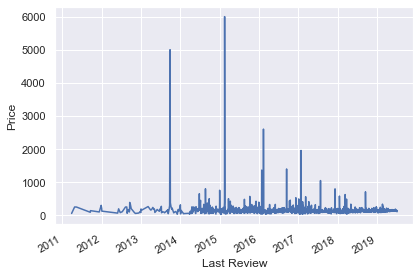

In [ ]:
#Visualize the time time series data
fig, ax = plt.subplots()
ax.plot(ts_df['Price'])
ax.set_xlabel('Last Review')
ax.set_ylabel('Price')

fig.autofmt_xdate()
plt.tight_layout()

# **Stationarity**

In [ ]:
#Sử dụng Dickey Fuller test để kiểm tra tính Stationary
from statsmodels.tsa.stattools import adfuller
adft = adfuller(ts_df,autolag="AIC") #autolag = AIc: the lag is chosen to minimize the information criterion
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

        Values                       Metric
0   -40.122416              Test Statistics
1     0.000000                      p-value
2     0.000000             No. of lags used
3  1763.000000  Number of observations used
4    -3.434065          critical value (1%)
5    -2.863181          critical value (5%)
6    -2.567644         critical value (10%)


Kết luận: data có tính dừng

# **Autocorrelation**

In [ ]:
autocorrelation_lag1 = ts_df['Price'].autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)

autocorrelation_lag3 = ts_df['Price'].autocorr(lag=3)
print("Three Month Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = ts_df['Price'].autocorr(lag=6)
print("Six Month Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = ts_df['Price'].autocorr(lag=9)
print("Nine Month Lag: ", autocorrelation_lag9)

One Month Lag:  0.04489789616778222
Three Month Lag:  0.009101540598138691
Six Month Lag:  -0.007949958902984746
Nine Month Lag:  -0.023030186856296854


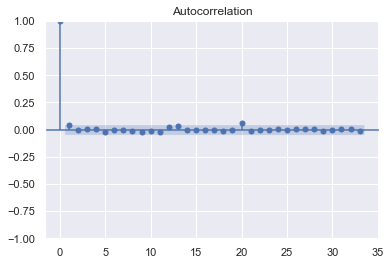

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
sns.set()
plot_acf(ts_df)
plt.show()

# **Decomposition**

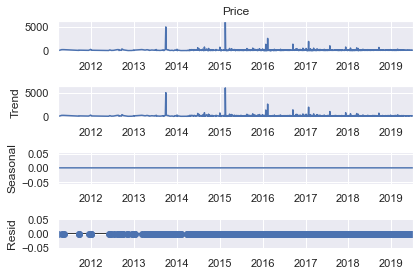

In [ ]:

from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(ts_df['Price'],model='additive', extrapolate_trend='freq', period=1)
decompose.plot()
plt.show()

Trend: Biểu đồ có dữ liệu bất thường tại năm 2015-2016, và đồng thời giá phòng cũng có chu kỳ tăng vào quý đầu của năm

Detrending the time series data

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(ts_df['Price'], model='multiplicative', period=30)
detrended = ts_df['Price'].values - result_mul.trend

detrended.head()

Last Review
2011-03-28   NaN
2011-04-25   NaN
2011-05-12   NaN
2011-09-18   NaN
2011-09-19   NaN
Name: trend, dtype: float64

Text(0.5, 1.0, 'Price detrended by subtracting the trend component')

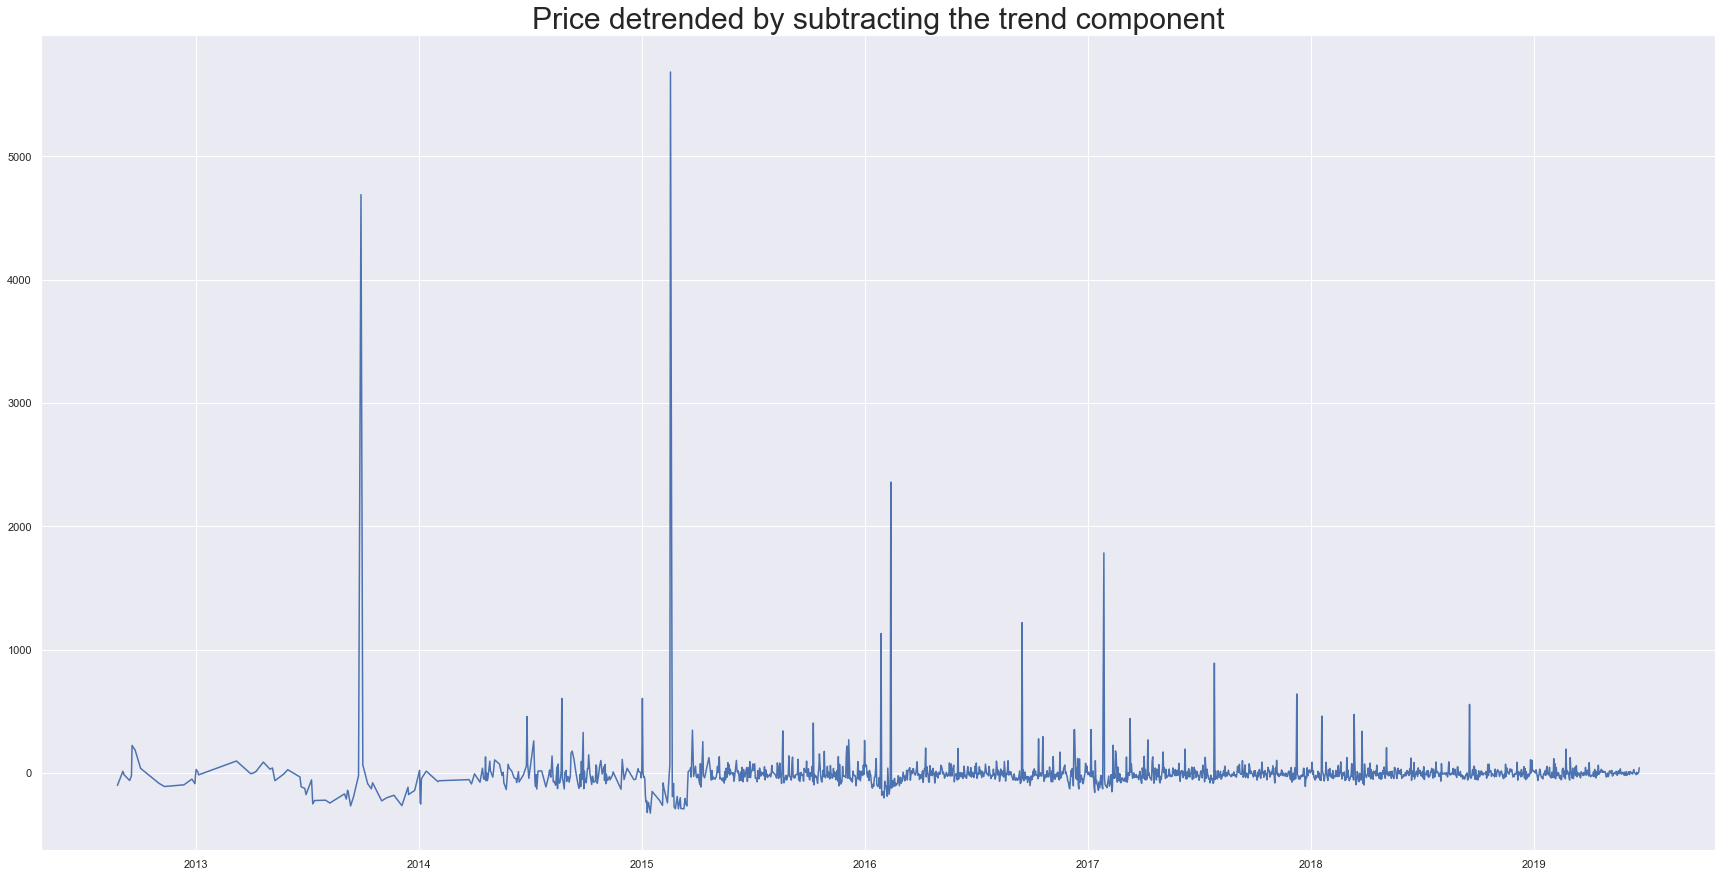

In [ ]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(15)
plt.plot(detrended)
plt.title('Price detrended by subtracting the trend component', fontsize=30)

In [ ]:
ts_df.head()

,Price
Last Review,
2011-03-28,55.0
2011-04-25,250.0
2011-05-12,249.0
2011-09-18,90.0
2011-09-19,140.0


In [ ]:
data1 = pd.DataFrame(detrended)

data = data1.dropna()

#Đổi tên cột trend về tên ban đầu
data['Price'] = data['trend']
del data['trend']

data.head()

C:\Users\Kiwine\AppData\Local\Temp/ipykernel_19916/3346356133.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'] = data['trend']


,Price
Last Review,
2012-08-25,-100.258333
2012-09-03,14.516667
2012-09-05,-14.050000
2012-09-14,-60.450000
2012-09-17,-21.950000


# **Forecasting**


In [ ]:
#Chia tập train, test (tìm vị trí index)
ts_df_copy = ts_df
ts_df_copy['Last Review'] = ts_df_copy.index

In [ ]:
ts_df_copy = ts_df_copy.reset_index(drop = True)
ts_df_copy.loc[round(len(ts_df_copy)*0.8,0)]

Price                   163.785714
Last Review    2018-07-21 00:00:00
Name: 1411, dtype: object

In [ ]:

data['Last Review'] = data.index
train = ts_df[ts_df['Last Review'] < pd.to_datetime("2018-07-21")]
train['train'] = train['Price']
del train['Last Review']
del train['Price']

test = ts_df[ts_df['Last Review'] >= pd.to_datetime("2018-07-21")]
del test['Last Review']
test['test'] = test['Price']
del test['Price']

C:\Users\Kiwine\AppData\Local\Temp/ipykernel_19916/3415785263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Last Review'] = data.index
C:\Users\Kiwine\AppData\Local\Temp/ipykernel_19916/3415785263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['Price']
C:\Users\Kiwine\AppData\Local\Temp/ipykernel_19916/3415785263.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

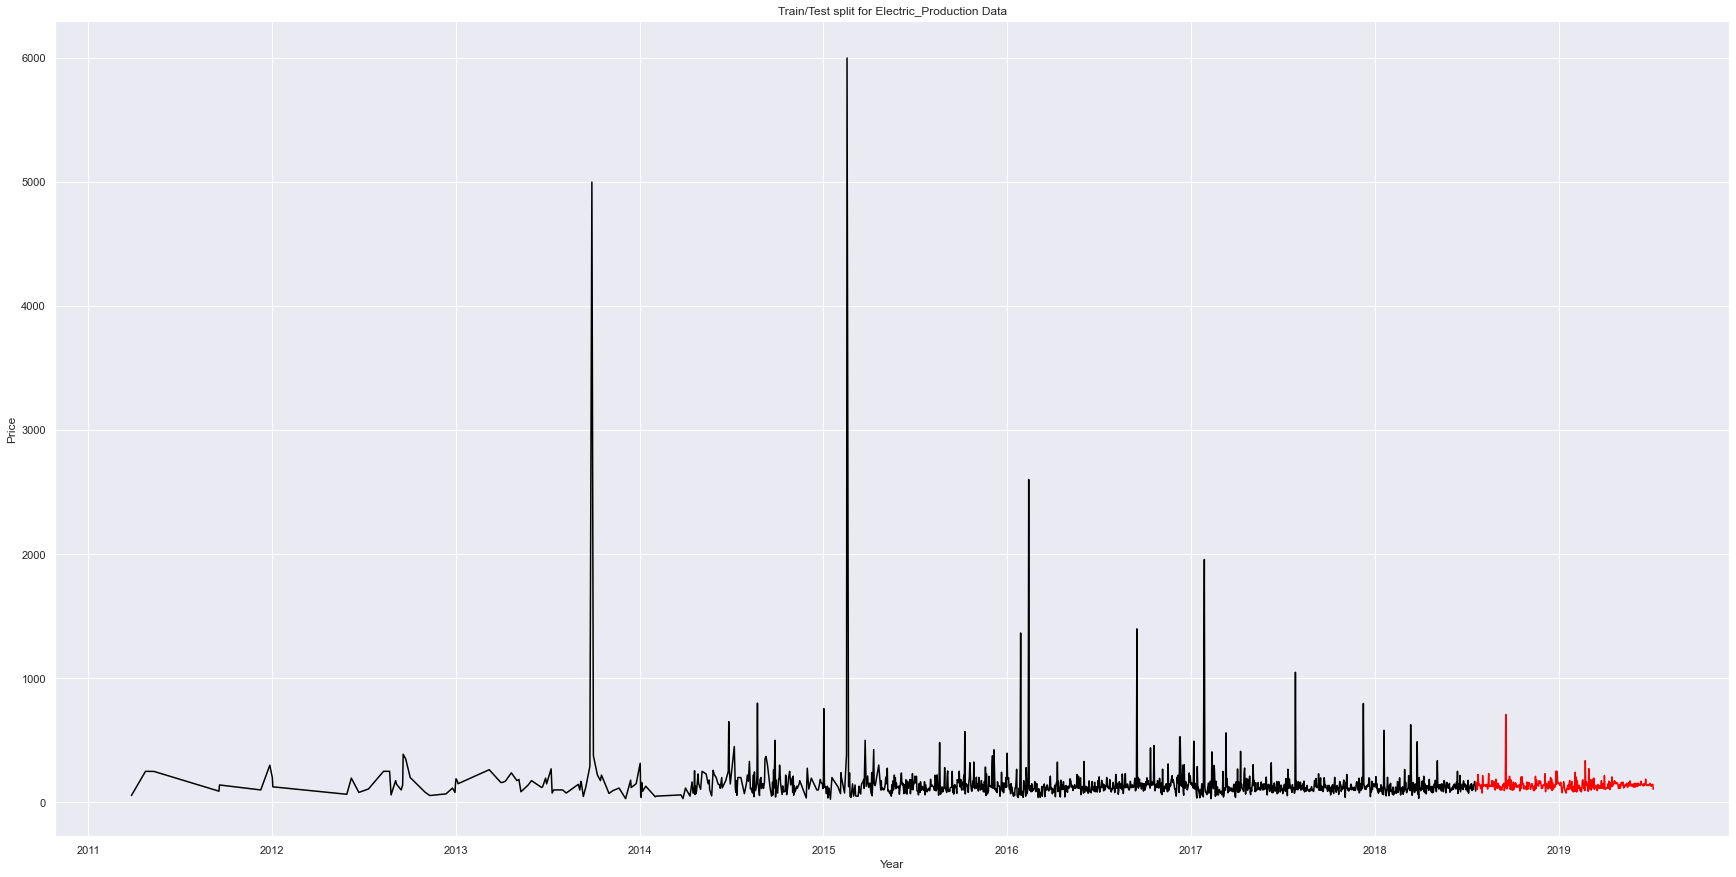

In [ ]:
#Visualize training and testing data
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(15)
plt.plot(train, color = "black")
plt.plot(test, color = "red")

plt.title("Train/Test split for Electric_Production Data")
plt.ylabel("Price")
plt.xlabel('Year')

sns.set()
plt.show()

In [ ]:
from pmdarima.arima import auto_arima

model = auto_arima(train, trace=True)
model.fit(train)

forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

ModuleNotFoundError: No module named 'pmdarima'

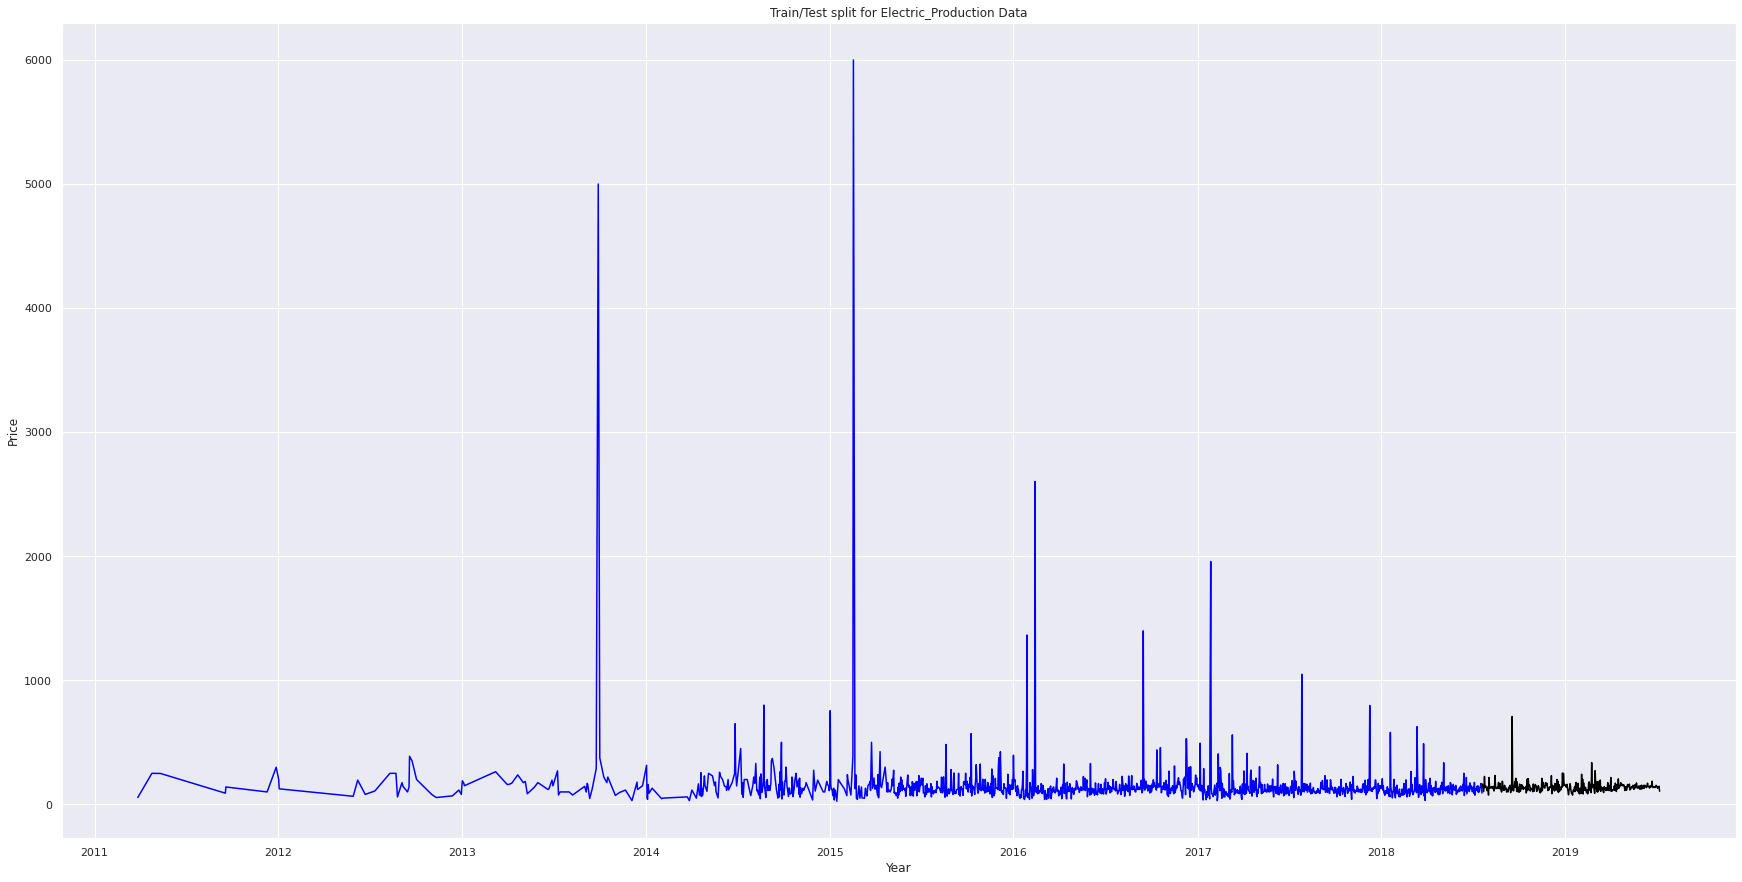

In [ ]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(15)
plt.plot(train, color = "blue", label = "Train")
plt.plot(test, color = "black", label = "Test")
plt.plot(forecast, color = 'orange', label = "Prediction")

plt.title("Train/Test split for Electric_Production Data")
plt.ylabel("Price")
plt.xlabel('Year')

sns.set()
plt.show()

In [ ]:

forecast.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 353 entries, 2018-07-21 to 2019-07-08
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Prediction  0 non-null      float64
dtypes: float64(1)
memory usage: 5.5 KB


Do dữ liệu không tăng theo chu kỳ của năm, dữ liệu ở các năm 2017 trở lại cao bất thường ==> không thể dự đoán được